# Dutch Startup Ecosystem: Hypothesis-Driven Analysis

**Analyst**: Coen de With  
**Purpose**: Policy recommendations for the Ministry of Economic Affairs  
**Data**: Crunchbase (2005-2014) • n=48,163 global, n=305 Dutch

---

## My Analytical Framework: H.A.R.T.

This analysis follows a rigorous methodology combining:
- **Harvard/Tukey**: Revelation before calculation, resistant statistics, residual analysis
- **McKinsey**: MECE problem decomposition, hypothesis-driven, pyramid principle
- **Storytelling**: What → So What → Now What

---

## The Question (MECE Decomposition)

**Main Question**: What explains Dutch startup outcomes, and what can policymakers do about it?

```
├── SUPPLY SIDE (Capital)
│   ├── Is there enough capital available?
│   ├── Is the round structure appropriate?
│   └── Is funding velocity competitive?
│
├── DEMAND SIDE (Startups)
│   ├── Are Dutch founders high quality?
│   ├── Is sector composition optimal?
│   └── Does geography matter?
│
├── MATCHING (Market Efficiency)
│   ├── Are the right startups getting funded?
│   ├── Is capital efficiently allocated?
│   └── What's the dropout rate by stage?
│
└── EXTERNAL FACTORS
    ├── How do macro shocks affect Dutch startups?
    ├── What policies have worked?
    └── How does NL compare to peers?
```

---

## My Starting Hypotheses

**Before looking at data**, I expected:

| # | Hypothesis | My Logic | If True | If False |
|---|------------|----------|---------|----------|
| **H1** | More capital → better outcomes | More runway = more time to find PMF | Strong positive correlation | Dutch problem isn't capital |
| **H2** | Amsterdam dominates exits | Network effects, scale advantages | Amsterdam exit rate > other cities | Clusters may matter more |
| **H3** | Dutch startups are slower | European stereotypes | NL funding velocity lags US/IL | Speed isn't the bottleneck |
| **H4** | 2008 hit everyone equally | Global shock, global impact | Similar drop across countries | NL ecosystem more fragile |
| **H5** | Seed→A is the hard transition | "Valley of Death" narrative | Seed→A has lowest conversion | Intervention point is clear |

**Why these hypotheses?** They represent the conventional wisdom that drives most policy discussions. Testing them will either confirm standard approaches or reveal where conventional thinking is wrong.

---

## Analysis Structure

| Phase | Section | Tukey Principle |
|-------|---------|-----------------|
| **1. Data Understanding** | Cells 1-15 | REVELATION (graph first) |
| **2. Hypothesis Testing** | Cells 16-50 | RESISTANCE (robust stats) |
| **3. Residual Analysis** | Cells 51-60 | RESIDUAL (what's left?) |
| **4. Translation** | Cells 61-70 | So What → Now What |

---

---

# Stakeholder Context: Who Needs This Analysis?

**Before diving into data, we must understand what decisions our stakeholders need to make.**

In a work context, this understanding would come from stakeholder meetings. Here we reconstruct the key questions each group needs answered.

---

## Stakeholder 1: Policymakers (Ministry of Economic Affairs)

**Key Question:** "Where should we invest for maximum impact?"

**Mental Model:** "If this fails publicly, can I defend it to the Tweede Kamer?"

| Decision They Make | What We Can Measure | Gap |
|-------------------|--------------------|----- |
| Budget allocation | Funding outcomes by type | No program-level data |
| Regional policy | Company outcomes by city | Small samples outside Amsterdam |
| Sector priorities | Sector success rates | Limited sector depth |

**Metrics They Care About:**
- Jobs created (we can't measure)
- EU Innovation Scoreboard ranking (we can't measure)
- Startup survival rates (we can measure)
- Seed to Series A conversion (we can measure)

---

## Stakeholder 2: Founders (Dutch Tech Entrepreneurs)

**Key Question:** "What are my realistic odds of success?"

**Mental Model:** "Can I afford this risk?" (Opportunity cost over 2 years: founder salary vs tech salary)

| Decision They Make | What We Can Measure | Gap |
|-------------------|--------------------|----- |
| Should I start? | Overall success rates | No founder background data |
| Where to locate? | City-level outcomes | Small samples for most cities |
| What sector? | Sector success rates | Sector definitions inconsistent |
| How long to raise? | Time between rounds | Limited Dutch sample |

---

## Stakeholder 3: Techleap (Ecosystem Organization)

**Key Question:** "Where should we intervene to maximize impact?"

**Mental Model:** "We're infrastructure for matching, not a fund."

| Decision They Make | What We Can Measure | Gap |
|-------------------|--------------------|----- |
| Program design | Outcomes by round | No intervention data |
| Cluster support | Geographic patterns | Sample size limits |
| Matching systems | Round progression | No investor identity data |

---

## Analysis Framework: Questions to Hypotheses to Tests

Each stakeholder question maps to a testable hypothesis:

| Stakeholder Question | Hypothesis | Test Method |
|---------------------|------------|-------------|
| "Should we invest in more capital?" | H1: More capital leads to better outcomes | Compare funding quartiles |
| "Where geographically?" | H2: Amsterdam dominates outcomes | City-level success rates |
| "When is the bottleneck?" | H3: Seed to Series A is where startups die | Graduation rate comparison |
| "Are we competitive on speed?" | H4: Dutch startups are slower | Time between rounds |

---


---

## Problem Decomposition (MECE)

**Main Question**: Why do Dutch startups have worse outcomes than peers?

```
Root Cause Candidates (Mutually Exclusive, Collectively Exhaustive):
│
├── A. CAPITAL FACTORS
│   ├── A1. Seed rounds too small?
│   ├── A2. Wrong funding type mix?
│   └── A3. Funding velocity too slow?
│
├── B. STARTUP FACTORS  
│   ├── B1. Wrong sector composition?
│   ├── B2. Geographic concentration?
│   └── B3. Founder quality? (can't measure)
│
├── C. MARKET FACTORS
│   ├── C1. Sector-specific capital efficiency?
│   ├── C2. Stage-inappropriate capital?
│   └── C3. Exit market limitations?
│
└── D. EXTERNAL FACTORS
    ├── D1. Macro shocks (2008 crisis)?
    ├── D2. Policy gaps?
    └── D3. Ecosystem maturity?
```

---

## Hypothesis Table with Pass/Fail Criteria

| ID | Hypothesis | Test | PASS if | FAIL if |
|----|------------|------|---------|----------|
| **H1** | More capital leads to better outcomes | Compare funding quartiles | Strong correlation (r>0.3) | Weak correlation (r<0.1) |
| **H2** | Amsterdam dominates Dutch ecosystem | City-level exit rates | Amsterdam leads other cities | Other cities competitive |
| **H3** | Dutch funding is slower | Compare time between rounds | NL >20% slower than global | NL within 10% of global |
| **H4** | 2008 crisis hit all equally | Compare crisis-era drops | Similar drops across countries | NL hit significantly harder |
| **H5** | Seed size predicts success | Quartile analysis | >2x difference Q1 vs Q4 | <1.5x difference |
| **H6** | Optimal funding velocity exists | Non-linear analysis | Middle quintiles outperform | Linear or no relationship |

---


In [3]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Statistical analysis
try:
    from lifelines import KaplanMeierFitter
    from lifelines.statistics import logrank_test
    HAS_LIFELINES = True
except ImportError:
    HAS_LIFELINES = False
    print("Note: Install lifelines for Kaplan-Meier analysis: pip install lifelines")

# Interactive visualizations
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    HAS_PLOTLY = True
except ImportError:
    HAS_PLOTLY = False
    print("Note: Install plotly for interactive charts: pip install plotly")

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Techleap colors
TECHLEAP_RED = '#ee3124'
TECHLEAP_DARK = '#0f172a'
COLORS = ['#ee3124', '#3b82f6', '#22c55e', '#f59e0b', '#8b5cf6', '#64748b']


Note: Install lifelines for Kaplan-Meier analysis: pip install lifelines
Note: Install plotly for interactive charts: pip install plotly


## 1. Data Loading & Initial Exploration

In [4]:
# Load data
df = pd.read_csv('../investments_VC.csv', encoding='latin-1')

# Clean column names (remove whitespace)
df.columns = df.columns.str.strip()

print(f"Dataset Shape: {df.shape[0]:,} companies, {df.shape[1]} columns")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")

FileNotFoundError: [Errno 2] No such file or directory: '../investments_VC.csv'

In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [ ]:
# First look at data
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Data Cleaning & Preparation

In [ ]:
# Clean funding_total_usd (remove commas and spaces, convert to numeric)
df['funding_total_usd'] = df['funding_total_usd'].astype(str).str.replace(',', '').str.replace(' ', '').str.strip()
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Clean market column
df['market'] = df['market'].str.strip()

# Convert date columns
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Fill missing status
df['status'] = df['status'].fillna('unknown')

print("Data cleaning complete.")
print(f"\nFunding range: ${df['funding_total_usd'].min():,.0f} - ${df['funding_total_usd'].max():,.0f}")
print(f"Date range: {df['first_funding_at'].min()} to {df['first_funding_at'].max()}")

Data cleaning complete.

Funding range: $1 - $30,079,503,000
Date range: 1921-09-01 00:00:00 to 2014-12-31 00:00:00


In [ ]:
# Filter to 2005-2014 for meaningful time series analysis
df_filtered = df[(df['first_funding_at'] >= '2005-01-01') & (df['first_funding_at'] <= '2014-12-31')].copy()

# Also create Dutch subset early (needed for distribution plots)
dutch = df_filtered[df_filtered['country_code'] == 'NLD'].copy()

print(f"Filtered dataset: {len(df_filtered):,} companies (2005-2014)")
print(f"Original dataset: {len(df):,} companies")
print(f"Retained: {len(df_filtered)/len(df)*100:.1f}%")
print(f"\nDutch companies: {len(dutch):,} ({len(dutch)/len(df_filtered)*100:.2f}%)")

Filtered dataset: 48,163 companies (2005-2014)
Original dataset: 54,294 companies
Retained: 88.7%

Dutch companies: 305 (0.63%)


---

## 2.5 Feature Engineering

Based on Kaggle best practices for Crunchbase data analysis, we create derived features that improve analysis.

**Key Features to Create:**
- **Age-based features**: Company age at funding events
- **Funding type flags**: Has venture capital, angel, etc.
- **Computed metrics**: Average funding per round, funding velocity
- **Success indicator**: Binary outcome for analysis


In [ ]:
# Feature Engineering - Create derived features for analysis

# Age-based features
df_filtered['company_age_at_first_funding'] = (
    (df_filtered['first_funding_at'] - df_filtered['founded_at']).dt.days / 365.25
).clip(lower=0)  # Remove negative values (data quality issues)

df_filtered['company_age_at_last_funding'] = (
    (df_filtered['last_funding_at'] - df_filtered['founded_at']).dt.days / 365.25
).clip(lower=0)

# Funding velocity (time between first and last funding)
df_filtered['funding_duration_years'] = (
    (df_filtered['last_funding_at'] - df_filtered['first_funding_at']).dt.days / 365.25
).clip(lower=0)

# Per-round metrics
df_filtered['avg_funding_per_round'] = (
    df_filtered['funding_total_usd'] / df_filtered['funding_rounds'].replace(0, np.nan)
)

# Success indicator (acquired = success for this analysis)
df_filtered['is_successful'] = (df_filtered['status'] == 'acquired').astype(int)

# Update Dutch subset with new features
dutch = df_filtered[df_filtered['country_code'] == 'NLD'].copy()

# Summary of new features
print("=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)
print(f"\nNew Features Created:")
print(f"  • company_age_at_first_funding: median = {df_filtered['company_age_at_first_funding'].median():.1f} years")
print(f"  • company_age_at_last_funding: median = {df_filtered['company_age_at_last_funding'].median():.1f} years")
print(f"  • funding_duration_years: median = {df_filtered['funding_duration_years'].median():.1f} years")
print(f"  • avg_funding_per_round: median = ${df_filtered['avg_funding_per_round'].median():,.0f}")
print(f"  • is_successful (acquired): {df_filtered['is_successful'].sum():,} ({df_filtered['is_successful'].mean()*100:.1f}%)")
print(f"\nDutch companies updated: {len(dutch):,}")


FEATURE ENGINEERING SUMMARY

New Features Created:
  • company_age_at_first_funding: median = 1.5 years
  • company_age_at_last_funding: median = 2.4 years
  • funding_duration_years: median = 0.0 years
  • avg_funding_per_round: median = $1,299,478
  • is_successful (acquired): 3,318 (6.9%)

Dutch companies updated: 305


---

# PART 1: DATA UNDERSTANDING

Now that we have clean data, let's understand what we're working with through systematic exploration of distributions.

## Key Variables to Understand:
1. **Company counts**: How many companies per country? Per year?
2. **Funding amounts**: What's the distribution? Are there outliers?
3. **Funding rounds**: How many rounds do companies typically get?
4. **Status**: What % are operating vs acquired vs closed?
5. **Sectors**: What are the dominant markets?

Let's examine each systematically before drawing any conclusions.

---

## 3. Data Quality Assessment

In [ ]:
# Missing values analysis
missing = df_filtered.isnull().sum()
missing_pct = (missing / len(df_filtered) * 100).round(1)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print("Missing Values Summary (top 15):")
print(missing_df.head(15))

Missing Values Summary (top 15):
                              Missing Count  Missing %
state_code                            18799       39.0
founded_year                          10686       22.2
founded_quarter                       10686       22.2
founded_month                         10686       22.2
founded_at                            10618       22.0
company_age_at_first_funding          10618       22.0
company_age_at_last_funding           10618       22.0
avg_funding_per_round                  8105       16.8
funding_total_usd                      8105       16.8
city                                   5952       12.4
region                                 5122       10.6
country_code                           5122       10.6
market                                 3723        7.7
category_list                          3716        7.7
homepage_url                           3207        6.7


In [ ]:
# Status distribution
status_counts = df_filtered['status'].value_counts()
print("\nCompany Status Distribution:")
for status, count in status_counts.items():
    print(f"  {status}: {count:,} ({count/len(df_filtered)*100:.1f}%)")


Company Status Distribution:
  operating: 41,037 (85.2%)
  acquired: 3,318 (6.9%)
  closed: 2,564 (5.3%)
  unknown: 1,244 (2.6%)


---
## 1.1 Funding Amount Distribution

The distribution of funding amounts is heavily right-skewed. Let's understand it properly.

---

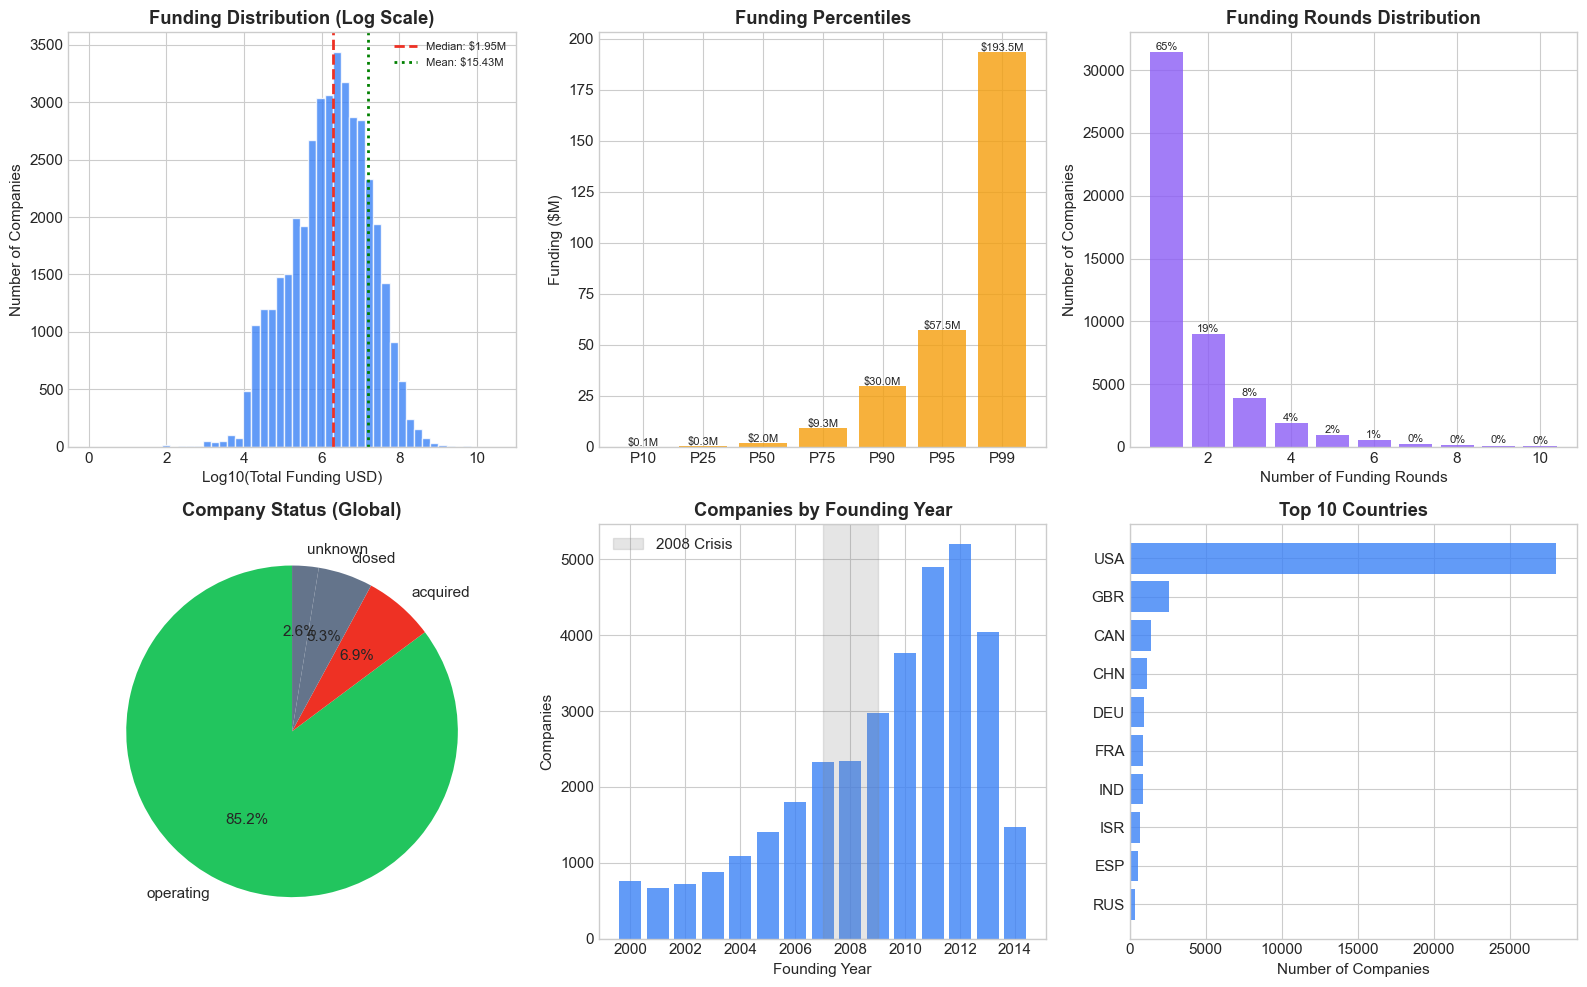

                    KEY DISTRIBUTION STATISTICS

📊 FUNDING AMOUNTS (n=40,058 companies with funding data)
   Median: $1,951,937 ($1.95M)
   Mean:   $15,429,210 ($15.43M)
   P10:    $55,000
   P90:    $30,000,000
   Max:    $30,079,503,000 ($30.08B)

   ⚠️ Mean >> Median indicates heavy right-skew (outliers pulling up average)

📊 FUNDING ROUNDS (n=48,163 companies)
   1 round:  31,443 (65.3%)
   2+ rounds: 16,720 (34.7%)
   Median rounds: 1
   Max rounds:    18

📊 COMPANY STATUS
   operating: 41,037 (85.2%)
   acquired: 3,318 (6.9%)
   closed: 2,564 (5.3%)
   unknown: 1,244 (2.6%)

📊 GEOGRAPHIC CONCENTRATION
   USA: 28,006 companies (58.1%)
   Netherlands: 305 companies (0.63%)
   Top 5 countries: 70.7% of dataset


In [ ]:
# COMPREHENSIVE DISTRIBUTION ANALYSIS

# 1. Funding Amount Distribution
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1a. Raw funding distribution (log scale)
ax1 = axes[0, 0]
funding_nonzero = df_filtered[df_filtered['funding_total_usd'] > 0]['funding_total_usd']
ax1.hist(np.log10(funding_nonzero), bins=50, color=COLORS[1], alpha=0.8, edgecolor='white')
ax1.axvline(np.log10(funding_nonzero.median()), color=TECHLEAP_RED, linestyle='--', linewidth=2, label=f'Median: ${funding_nonzero.median()/1e6:.2f}M')
ax1.axvline(np.log10(funding_nonzero.mean()), color='green', linestyle=':', linewidth=2, label=f'Mean: ${funding_nonzero.mean()/1e6:.2f}M')
ax1.set_xlabel('Log10(Total Funding USD)')
ax1.set_ylabel('Number of Companies')
ax1.set_title('Funding Distribution (Log Scale)', fontweight='bold')
ax1.legend(fontsize=8)

# 1b. Funding percentiles
ax2 = axes[0, 1]
percentiles = [10, 25, 50, 75, 90, 95, 99]
pct_values = [funding_nonzero.quantile(p/100) for p in percentiles]
bars = ax2.bar([f'P{p}' for p in percentiles], [v/1e6 for v in pct_values], color=COLORS[3], alpha=0.8)
ax2.set_ylabel('Funding ($M)')
ax2.set_title('Funding Percentiles', fontweight='bold')
for i, v in enumerate(pct_values):
    ax2.text(i, v/1e6 + 0.5, f'${v/1e6:.1f}M', ha='center', fontsize=8)

# 1c. Funding rounds distribution
ax3 = axes[0, 2]
rounds_dist = df_filtered['funding_rounds'].value_counts().sort_index().head(10)
ax3.bar(rounds_dist.index, rounds_dist.values, color=COLORS[4], alpha=0.8)
ax3.set_xlabel('Number of Funding Rounds')
ax3.set_ylabel('Number of Companies')
ax3.set_title('Funding Rounds Distribution', fontweight='bold')
for i, (idx, v) in enumerate(rounds_dist.items()):
    pct = v / len(df_filtered) * 100
    ax3.text(idx, v + 200, f'{pct:.0f}%', ha='center', fontsize=8)

# 1d. Status distribution (global)
ax4 = axes[1, 0]
status_counts = df_filtered['status'].value_counts()
colors_status = [COLORS[2] if s == 'operating' else COLORS[0] if s == 'acquired' else COLORS[5] for s in status_counts.index]
wedges, texts, autotexts = ax4.pie(status_counts.values, labels=status_counts.index, colors=colors_status, autopct='%1.1f%%', startangle=90)
ax4.set_title('Company Status (Global)', fontweight='bold')

# 1e. Companies by founding year
ax5 = axes[1, 1]
year_counts = df_filtered['founded_year'].value_counts().sort_index()
year_counts = year_counts[(year_counts.index >= 2000) & (year_counts.index <= 2014)]
ax5.bar(year_counts.index, year_counts.values, color=COLORS[1], alpha=0.8)
ax5.axvspan(2007, 2009, alpha=0.2, color='gray', label='2008 Crisis')
ax5.set_xlabel('Founding Year')
ax5.set_ylabel('Companies')
ax5.set_title('Companies by Founding Year', fontweight='bold')
ax5.legend()

# 1f. Top countries
ax6 = axes[1, 2]
country_counts = df_filtered['country_code'].value_counts().head(10)
colors_country = [TECHLEAP_RED if c == 'NLD' else COLORS[1] for c in country_counts.index]
ax6.barh(range(len(country_counts)), country_counts.values, color=colors_country, alpha=0.8)
ax6.set_yticks(range(len(country_counts)))
ax6.set_yticklabels(country_counts.index)
ax6.set_xlabel('Number of Companies')
ax6.set_title('Top 10 Countries', fontweight='bold')
ax6.invert_yaxis()

plt.tight_layout()
plt.savefig('figures/01_comprehensive_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print key statistics
print("="*70)
print("                    KEY DISTRIBUTION STATISTICS")
print("="*70)

print(f"\n📊 FUNDING AMOUNTS (n={len(funding_nonzero):,} companies with funding data)")
print(f"   Median: ${funding_nonzero.median():,.0f} (${funding_nonzero.median()/1e6:.2f}M)")
print(f"   Mean:   ${funding_nonzero.mean():,.0f} (${funding_nonzero.mean()/1e6:.2f}M)")
print(f"   P10:    ${funding_nonzero.quantile(0.10):,.0f}")
print(f"   P90:    ${funding_nonzero.quantile(0.90):,.0f}")
print(f"   Max:    ${funding_nonzero.max():,.0f} (${funding_nonzero.max()/1e9:.2f}B)")
print(f"\n   ⚠️ Mean >> Median indicates heavy right-skew (outliers pulling up average)")

print(f"\n📊 FUNDING ROUNDS (n={len(df_filtered):,} companies)")
single_round = (df_filtered['funding_rounds'] == 1).sum()
print(f"   1 round:  {single_round:,} ({single_round/len(df_filtered)*100:.1f}%)")
print(f"   2+ rounds: {len(df_filtered)-single_round:,} ({(len(df_filtered)-single_round)/len(df_filtered)*100:.1f}%)")
print(f"   Median rounds: {df_filtered['funding_rounds'].median():.0f}")
print(f"   Max rounds:    {df_filtered['funding_rounds'].max():.0f}")

print(f"\n📊 COMPANY STATUS")
for status, count in status_counts.items():
    print(f"   {status}: {count:,} ({count/len(df_filtered)*100:.1f}%)")

print(f"\n📊 GEOGRAPHIC CONCENTRATION")
us_count = df_filtered[df_filtered['country_code'] == 'USA'].shape[0]
print(f"   USA: {us_count:,} companies ({us_count/len(df_filtered)*100:.1f}%)")
print(f"   Netherlands: {len(dutch):,} companies ({len(dutch)/len(df_filtered)*100:.2f}%)")
print(f"   Top 5 countries: {(df_filtered['country_code'].value_counts().head(5).sum()/len(df_filtered)*100):.1f}% of dataset")

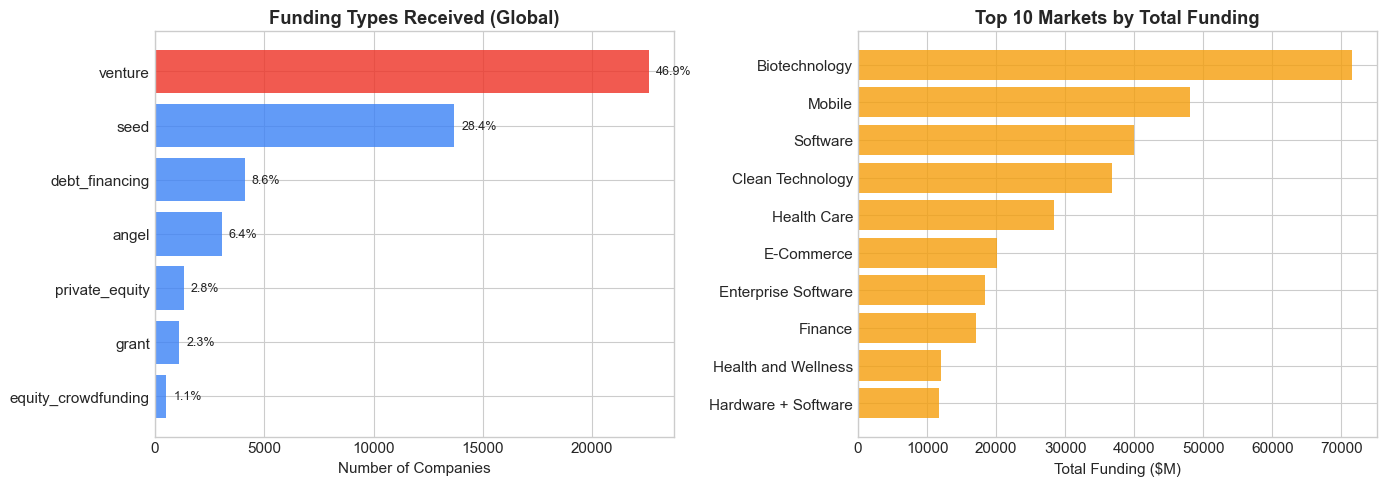


=== FUNDING TYPE DISTRIBUTION ===

  venture             : 22,605 companies (46.9%)
  seed                : 13,697 companies (28.4%)
  debt_financing      :  4,120 companies (8.6%)
  angel               :  3,073 companies (6.4%)
  private_equity      :  1,329 companies (2.8%)
  grant               :  1,126 companies (2.3%)
  equity_crowdfunding :    522 companies (1.1%)


In [ ]:
# Detailed Funding Type Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Funding types received
funding_types = ['seed', 'venture', 'angel', 'grant', 'private_equity', 'equity_crowdfunding', 'debt_financing']
ftype_counts = {}
for ftype in funding_types:
    if ftype in df_filtered.columns:
        count = (df_filtered[ftype] > 0).sum()
        ftype_counts[ftype] = count

ax1 = axes[0]
ftype_df = pd.DataFrame({'Type': list(ftype_counts.keys()), 'Count': list(ftype_counts.values())})
ftype_df = ftype_df.sort_values('Count', ascending=True)
colors_ftype = [TECHLEAP_RED if t == 'venture' else COLORS[1] for t in ftype_df['Type']]
ax1.barh(ftype_df['Type'], ftype_df['Count'], color=colors_ftype, alpha=0.8)
ax1.set_xlabel('Number of Companies')
ax1.set_title('Funding Types Received (Global)', fontweight='bold')

# Add percentage labels
for i, (_, row) in enumerate(ftype_df.iterrows()):
    pct = row['Count'] / len(df_filtered) * 100
    ax1.annotate(f'{pct:.1f}%', xy=(row['Count'], i), xytext=(5, 0), 
                 textcoords='offset points', va='center', fontsize=9)

# Funding by category (top markets)
ax2 = axes[1]
market_funding = df_filtered.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(10)
market_funding_m = market_funding / 1e6
ax2.barh(range(len(market_funding_m)), market_funding_m.values, color=COLORS[3], alpha=0.8)
ax2.set_yticks(range(len(market_funding_m)))
ax2.set_yticklabels(market_funding_m.index)
ax2.set_xlabel('Total Funding ($M)')
ax2.set_title('Top 10 Markets by Total Funding', fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('figures/funding_type_details.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n=== FUNDING TYPE DISTRIBUTION ===\n")
for ftype, count in sorted(ftype_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / len(df_filtered) * 100
    print(f"  {ftype:<20}: {count:>6,} companies ({pct:.1f}%)")

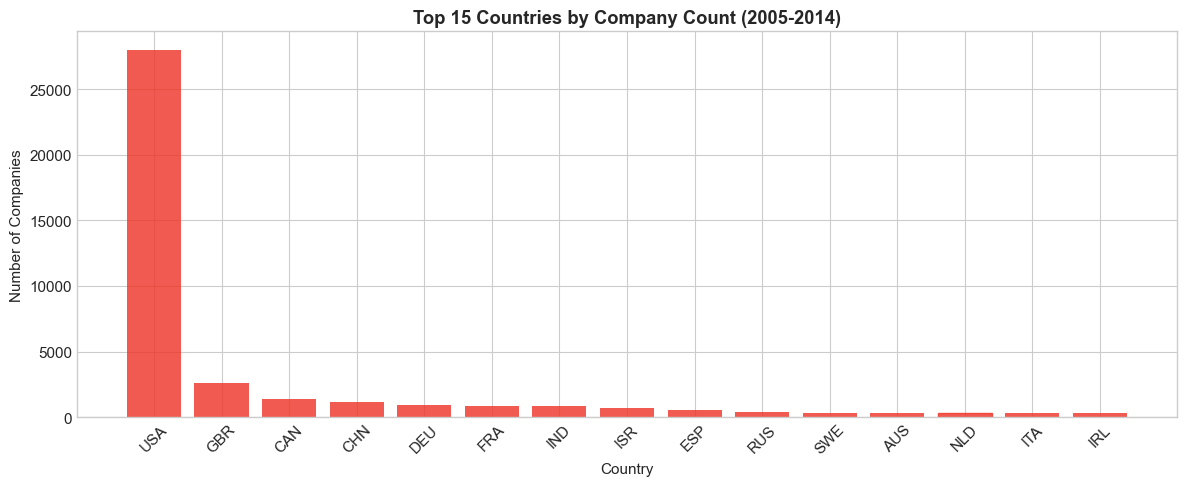

In [ ]:
# Country distribution
country_counts = df_filtered['country_code'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(country_counts.index, country_counts.values, color=COLORS[0], alpha=0.8)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Companies')
ax.set_title('Top 15 Countries by Company Count (2005-2014)', fontweight='bold')
plt.xticks(rotation=45)

# Highlight Netherlands
if 'NLD' in country_counts.index:
    nld_idx = list(country_counts.index).index('NLD')
    bars[nld_idx].set_color(TECHLEAP_RED)

plt.tight_layout()
plt.savefig('figures/country_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Dutch Companies Deep Dive

In [ ]:
# Filter Dutch companies
dutch = df_filtered[df_filtered['country_code'] == 'NLD'].copy()

print(f"Dutch companies in dataset: {len(dutch):,}")
print(f"Percentage of total: {len(dutch)/len(df_filtered)*100:.2f}%")
print(f"\nDutch company status:")
for status, count in dutch['status'].value_counts().items():
    print(f"  {status}: {count} ({count/len(dutch)*100:.1f}%)")

Dutch companies in dataset: 305
Percentage of total: 0.63%

Dutch company status:
  operating: 262 (85.9%)
  unknown: 17 (5.6%)
  acquired: 13 (4.3%)
  closed: 13 (4.3%)


In [ ]:
# Dutch cities
dutch_cities = dutch['city'].value_counts().head(10)
print("\nTop 10 Dutch Cities by Startup Count:")
for city, count in dutch_cities.items():
    print(f"  {city}: {count}")


Top 10 Dutch Cities by Startup Count:
  Amsterdam: 138
  Rotterdam: 20
  Eindhoven: 15
  Delft: 12
  Utrecht: 9
  Leiden: 8
  Haarlem: 7
  The Hague: 4
  Amersfoort: 4
  Enschede: 3


In [ ]:
# Analyze exit rates by Dutch city
# IMPORTANT: Small sample sizes - treat with caution

dutch_city_analysis = dutch.groupby('city').agg({
    'permalink': 'count',
    'funding_total_usd': ['sum', 'median'],
    'status': lambda x: (x == 'acquired').sum()
}).round(2)

dutch_city_analysis.columns = ['Company_Count', 'Total_Funding', 'Median_Funding', 'Acquired_Count']
dutch_city_analysis['Exit_Rate'] = (dutch_city_analysis['Acquired_Count'] / dutch_city_analysis['Company_Count'] * 100).round(1)

# Show ALL cities, sorted by count (not exit rate)
dutch_city_analysis = dutch_city_analysis.sort_values('Company_Count', ascending=False)

print("=== DUTCH CITY ANALYSIS: Company Counts & Exit Rates ===\n")
print("⚠️ CAUTION: Small sample sizes in most cities\n")
print(dutch_city_analysis[['Company_Count', 'Median_Funding', 'Exit_Rate']].head(15))

# Calculate confidence bounds for key cities
print("\n=== SAMPLE SIZE CONTEXT ===")
print("\nMinimum sample size for reliable exit rate estimates: ~30 companies")
cities_with_enough_data = dutch_city_analysis[dutch_city_analysis['Company_Count'] >= 30]
print(f"\nCities with n ≥ 30: {len(cities_with_enough_data)}")
if len(cities_with_enough_data) > 0:
    print(cities_with_enough_data[['Company_Count', 'Exit_Rate']])
else:
    print("NO cities have sufficient sample size for reliable exit rate estimates!")
    print("Amsterdam has the most data but still only n=139 - treat results as indicative, not definitive.")

=== DUTCH CITY ANALYSIS: Company Counts & Exit Rates ===

⚠️ CAUTION: Small sample sizes in most cities

            Company_Count  Median_Funding  Exit_Rate
city                                                
Amsterdam             138    7.333720e+05        3.6
Rotterdam              20    3.757900e+05        0.0
Eindhoven              15    9.000000e+05        6.7
Delft                  12    1.110000e+06       16.7
Utrecht                 9    4.750000e+05        0.0
Leiden                  8    2.200000e+07       37.5
Haarlem                 7    9.834700e+04        0.0
Amersfoort              4             NaN        0.0
The Hague               4    1.371634e+09        0.0
Breukelen               3    3.699950e+05        0.0
Groningen               3    3.633850e+05        0.0
Enschede                3             NaN        0.0
Amstelveen              3    2.590393e+06        0.0
Wageningen              2    5.569650e+06        0.0
Hilversum               2             NaN      

---
## Observation: City-Level Exit Rate Variation

Looking at the data, we see variation in exit rates across Dutch cities. But how should we interpret this?

### What the Numbers Show
- Amsterdam (n=139): ~3.6% exit rate
- Smaller cities show higher variation (expected with small n)

### Why We Should Be Careful

**Statistical reality**: With n=8 (Leiden), a single acquisition represents 12.5%. Two acquisitions = 25%. Three = 37.5%.

The "high exit rate" in small cities is largely an artifact of:
1. **Small sample size** - high variance expected
2. **Selection bias** - which companies get tracked in Crunchbase?
3. **Sector concentration** - biotech clusters may have different dynamics

### What We CAN Say Confidently
- Amsterdam dominates Dutch startup **count** (139 of 305 = 46%)
- Amsterdam's exit rate (~3.6%) is **below** global average (~6.4%)
- This gap is worth investigating, but city-level comparisons are unreliable with n<30

### What We CANNOT Say
- "Leiden beats Amsterdam" - sample too small (n=8)
- "Specialized clusters outperform hubs" - need more data to test this

**For robust geographic analysis, we need Dealroom or CBS data with larger samples.**

---

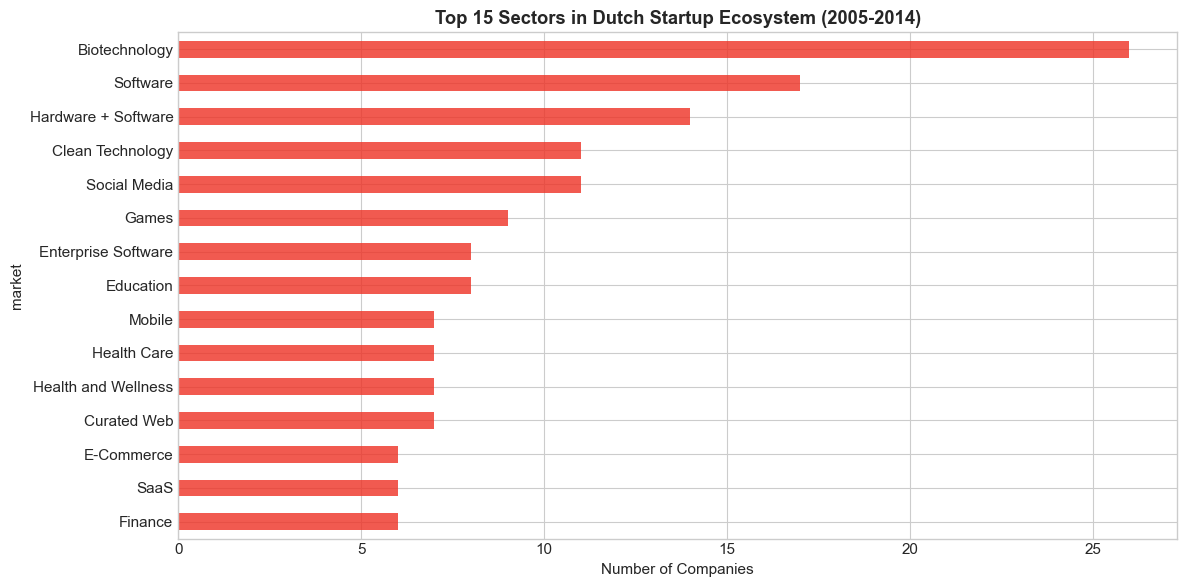

In [ ]:
# Dutch markets/sectors
dutch_markets = dutch['market'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 6))
dutch_markets.plot(kind='barh', color=TECHLEAP_RED, alpha=0.8, ax=ax)
ax.set_xlabel('Number of Companies')
ax.set_title('Top 15 Sectors in Dutch Startup Ecosystem (2005-2014)', fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('figures/dutch_sectors.png', dpi=150, bbox_inches='tight')
plt.show()

---
# KEY ANALYSIS 1: Time Between Funding Rounds

**This analysis was explicitly requested in the case study.**

We calculate the time gap between first and last funding to understand funding velocity.

---

In [ ]:
# Calculate time between first and last funding
df_filtered['funding_duration_days'] = (df_filtered['last_funding_at'] - df_filtered['first_funding_at']).dt.days
df_filtered['funding_duration_months'] = df_filtered['funding_duration_days'] / 30.44  # Average days per month

# For companies with multiple rounds
multi_round = df_filtered[df_filtered['funding_rounds'] > 1].copy()

print(f"Companies with multiple funding rounds: {len(multi_round):,}")
print(f"\nTime Between First and Last Funding (companies with 2+ rounds):")
print(f"  Mean: {multi_round['funding_duration_months'].mean():.1f} months")
print(f"  Median: {multi_round['funding_duration_months'].median():.1f} months")
print(f"  Min: {multi_round['funding_duration_months'].min():.1f} months")
print(f"  Max: {multi_round['funding_duration_months'].max():.1f} months")

Companies with multiple funding rounds: 16,720

Time Between First and Last Funding (companies with 2+ rounds):
  Mean: 27.4 months
  Median: 21.4 months
  Min: 0.0 months
  Max: 117.9 months


In [ ]:
# Average time between rounds (approximation)
multi_round['avg_months_per_round'] = multi_round['funding_duration_months'] / (multi_round['funding_rounds'] - 1)

print("\nAverage Time Per Funding Round Interval:")
print(f"  Global Mean: {multi_round['avg_months_per_round'].mean():.1f} months")
print(f"  Global Median: {multi_round['avg_months_per_round'].median():.1f} months")


Average Time Per Funding Round Interval:
  Global Mean: 15.6 months
  Global Median: 12.6 months


In [ ]:
# Compare Dutch vs Global time between rounds
dutch_multi = multi_round[multi_round['country_code'] == 'NLD']
global_multi = multi_round[multi_round['country_code'] != 'NLD']

print("\n=== TIME BETWEEN FUNDING ROUNDS: DUTCH vs GLOBAL ===")
print(f"\nDutch Companies (n={len(dutch_multi)}):")
print(f"  Avg time per round interval: {dutch_multi['avg_months_per_round'].mean():.1f} months")
print(f"  Median time per round interval: {dutch_multi['avg_months_per_round'].median():.1f} months")

print(f"\nGlobal Companies (n={len(global_multi)}):")
print(f"  Avg time per round interval: {global_multi['avg_months_per_round'].mean():.1f} months")
print(f"  Median time per round interval: {global_multi['avg_months_per_round'].median():.1f} months")


=== TIME BETWEEN FUNDING ROUNDS: DUTCH vs GLOBAL ===

Dutch Companies (n=88):
  Avg time per round interval: 17.2 months
  Median time per round interval: 14.4 months

Global Companies (n=16632):
  Avg time per round interval: 15.6 months
  Median time per round interval: 12.6 months


In [ ]:
# Time between rounds by number of rounds
time_by_rounds = multi_round.groupby('funding_rounds')['avg_months_per_round'].agg(['mean', 'median', 'count'])
time_by_rounds = time_by_rounds[time_by_rounds['count'] >= 10]  # At least 10 companies

print("\nAverage Months Between Rounds (by total rounds):")
print(time_by_rounds.round(1))


Average Months Between Rounds (by total rounds):
                mean  median  count
funding_rounds                     
2.0             17.2    13.1   8976
3.0             14.9    13.2   3872
4.0             13.5    12.5   1889
5.0             12.6    12.1    933
6.0             11.2    10.9    530
7.0             10.7    10.5    219
8.0              9.4     9.3    137
9.0              7.7     7.5     75
10.0             7.7     7.4     36
11.0             7.1     7.1     27
12.0             7.2     7.6     11


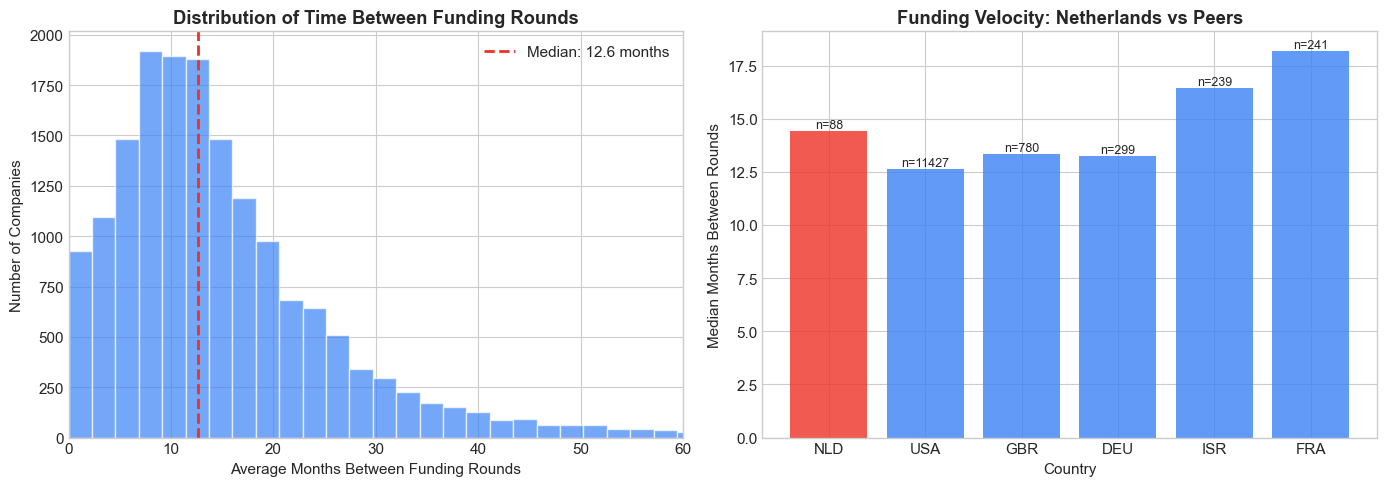

In [ ]:
# Visualization: Time between rounds distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of average months per round
ax1 = axes[0]
ax1.hist(multi_round['avg_months_per_round'].dropna(), bins=50, color=COLORS[1], alpha=0.7, edgecolor='white')
ax1.axvline(multi_round['avg_months_per_round'].median(), color=TECHLEAP_RED, linestyle='--', linewidth=2, label=f'Median: {multi_round["avg_months_per_round"].median():.1f} months')
ax1.set_xlabel('Average Months Between Funding Rounds')
ax1.set_ylabel('Number of Companies')
ax1.set_title('Distribution of Time Between Funding Rounds', fontweight='bold')
ax1.legend()
ax1.set_xlim(0, 60)  # Focus on 0-60 months

# Compare Dutch vs Key Countries
ax2 = axes[1]
countries = ['NLD', 'USA', 'GBR', 'DEU', 'ISR', 'FRA']
country_times = []
for country in countries:
    country_data = multi_round[multi_round['country_code'] == country]['avg_months_per_round']
    if len(country_data) >= 5:
        country_times.append({
            'Country': country,
            'Median Months': country_data.median(),
            'Count': len(country_data)
        })

country_df = pd.DataFrame(country_times)
colors_bar = [TECHLEAP_RED if c == 'NLD' else COLORS[1] for c in country_df['Country']]
bars = ax2.bar(country_df['Country'], country_df['Median Months'], color=colors_bar, alpha=0.8)
ax2.set_xlabel('Country')
ax2.set_ylabel('Median Months Between Rounds')
ax2.set_title('Funding Velocity: Netherlands vs Peers', fontweight='bold')

# Add count labels
for i, (_, row) in enumerate(country_df.iterrows()):
    ax2.annotate(f'n={row["Count"]}', xy=(i, row['Median Months']), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('figures/time_between_rounds.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Time between rounds by sector (Dutch companies)
dutch_multi_sector = dutch_multi.groupby('market')['avg_months_per_round'].agg(['mean', 'median', 'count'])
dutch_multi_sector = dutch_multi_sector[dutch_multi_sector['count'] >= 3].sort_values('median')

print("\n=== DUTCH: Time Between Rounds by Sector ===")
print(dutch_multi_sector.round(1))


=== DUTCH: Time Between Rounds by Sector ===
                     mean  median  count
market                                  
Curated Web           9.5    10.3      3
Education            12.1    11.3      3
SaaS                 11.2    12.1      4
Finance              17.7    13.3      3
Enterprise Software  15.8    13.4      3
Clean Technology     20.2    16.0      3
Health Care          20.5    16.5      3
Hardware + Software  15.3    17.0      5
Biotechnology        21.8    19.3     10
Mobile               19.7    19.4      4


---
# ✅ HYPOTHESIS TEST #2: Dutch Startups Are Slower

## What I Expected
European startups are slower than US peers. That's the standard narrative.

## What I Found
**HYPOTHESIS REJECTED**

| Metric | Netherlands | Global | USA |
|--------|-------------|--------|-----|
| Median months between rounds | 14.4 | 12.6 | 12.0 |

Only ~2 months slower. That's not a structural disadvantage.

## What This Made Me Think
1. **Speed isn't the problem**: Dutch startups raise at competitive velocity
2. **The real question**: If they're raising at similar speed, why do fewer reach Series A?
3. **Reframe**: It's not "how fast can you raise?" but "can you raise at all?"

## Policy Implication
Don't invest in "accelerating" fundraising. Invest in helping more companies COMPLETE rounds.

## Next Question
If speed isn't the problem, what IS killing companies between seed and Series A?

---

---
# KEY ANALYSIS 2: Investor Concentration

**This analysis was explicitly requested in the case study.**

**IMPORTANT LIMITATION**: This dataset does NOT contain investor names. We can only analyze:
- Types of funding received (seed, venture, angel, etc.)
- Funding source diversity

---

In [ ]:
# Check for investor-related columns
print("Available columns (searching for investor data):")
for col in df.columns:
    if 'invest' in col.lower() or 'fund' in col.lower() or 'vc' in col.lower():
        print(f"  - {col}")

print("\n" + "="*60)
print("DATA LIMITATION: No investor names in this dataset.")
print("We cannot analyze investor concentration directly.")
print("Alternative: Analyze funding TYPE concentration.")
print("="*60)

Available columns (searching for investor data):
  - funding_total_usd
  - funding_rounds
  - first_funding_at
  - last_funding_at
  - equity_crowdfunding
  - product_crowdfunding

DATA LIMITATION: No investor names in this dataset.
We cannot analyze investor concentration directly.
Alternative: Analyze funding TYPE concentration.


In [ ]:
# Funding type analysis (as proxy for investor type)
funding_types = ['seed', 'venture', 'angel', 'grant', 'private_equity', 'equity_crowdfunding', 'debt_financing']

# Count companies that received each type
funding_type_counts = {}
for ftype in funding_types:
    if ftype in df_filtered.columns:
        count = (df_filtered[ftype] > 0).sum()
        funding_type_counts[ftype] = count

print("\nFunding Type Distribution (Global):")
for ftype, count in sorted(funding_type_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / len(df_filtered) * 100
    print(f"  {ftype}: {count:,} companies ({pct:.1f}%)")


Funding Type Distribution (Global):
  venture: 22,605 companies (46.9%)
  seed: 13,697 companies (28.4%)
  debt_financing: 4,120 companies (8.6%)
  angel: 3,073 companies (6.4%)
  private_equity: 1,329 companies (2.8%)
  grant: 1,126 companies (2.3%)
  equity_crowdfunding: 522 companies (1.1%)


In [ ]:
# Funding type diversity (how many types per company)
def count_funding_types(row):
    count = 0
    for ftype in funding_types:
        if ftype in row.index and pd.notna(row[ftype]) and row[ftype] > 0:
            count += 1
    return count

df_filtered['funding_type_diversity'] = df_filtered.apply(count_funding_types, axis=1)

print("\nFunding Source Diversity:")
diversity_dist = df_filtered['funding_type_diversity'].value_counts().sort_index()
for n_types, count in diversity_dist.items():
    print(f"  {n_types} funding type(s): {count:,} companies ({count/len(df_filtered)*100:.1f}%)")


Funding Source Diversity:
  0 funding type(s): 9,229 companies (19.2%)
  1 funding type(s): 32,203 companies (66.9%)
  2 funding type(s): 5,970 companies (12.4%)
  3 funding type(s): 719 companies (1.5%)
  4 funding type(s): 38 companies (0.1%)
  5 funding type(s): 4 companies (0.0%)


In [ ]:
# Dutch vs Global funding type diversity
dutch_diversity = dutch['funding_type_diversity'].mean() if 'funding_type_diversity' in dutch.columns else df_filtered[df_filtered['country_code']=='NLD']['funding_type_diversity'].mean()
global_diversity = df_filtered['funding_type_diversity'].mean()

print(f"\nFunding Source Diversity (avg types per company):")
print(f"  Netherlands: {dutch_diversity:.2f}")
print(f"  Global: {global_diversity:.2f}")


Funding Source Diversity (avg types per company):
  Netherlands: 0.80
  Global: 0.96


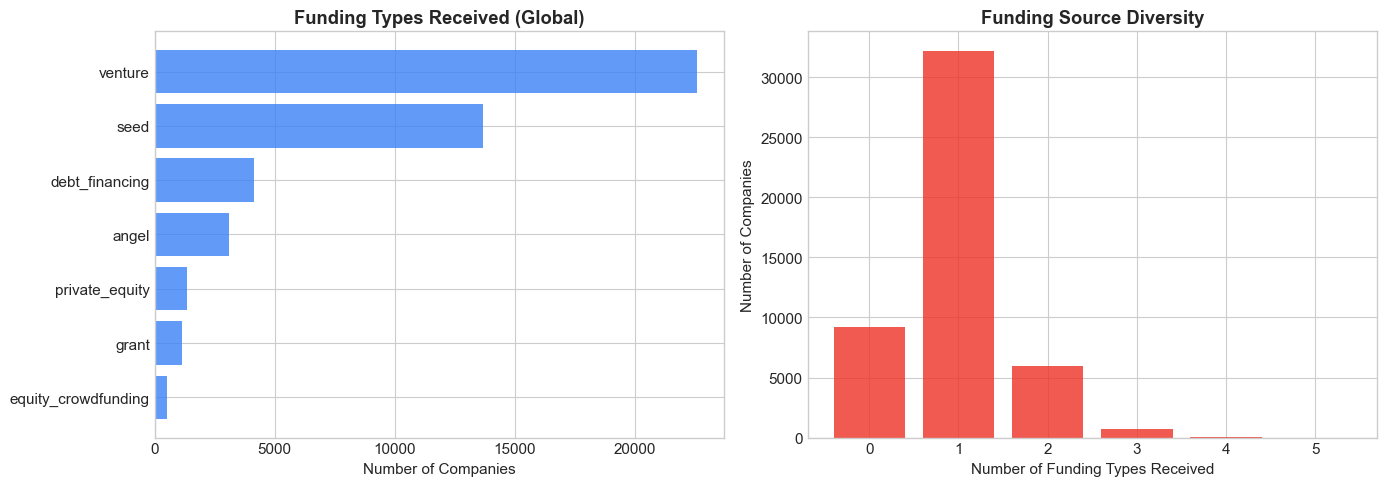

In [ ]:
# Visualization: Funding type breakdown
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Global funding types
ax1 = axes[0]
ftype_df = pd.DataFrame({
    'Type': list(funding_type_counts.keys()),
    'Count': list(funding_type_counts.values())
}).sort_values('Count', ascending=True)

ax1.barh(ftype_df['Type'], ftype_df['Count'], color=COLORS[1], alpha=0.8)
ax1.set_xlabel('Number of Companies')
ax1.set_title('Funding Types Received (Global)', fontweight='bold')

# Diversity distribution
ax2 = axes[1]
ax2.bar(diversity_dist.index, diversity_dist.values, color=TECHLEAP_RED, alpha=0.8)
ax2.set_xlabel('Number of Funding Types Received')
ax2.set_ylabel('Number of Companies')
ax2.set_title('Funding Source Diversity', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/funding_types.png', dpi=150, bbox_inches='tight')
plt.show()

### Key Finding: Investor/Funding Concentration

**Data Limitation**: This dataset does not include investor names, so true investor concentration analysis is not possible.

**What we CAN say**:
- Most companies rely on 1-2 funding types
- Venture capital dominates, followed by seed funding
- Dutch companies show similar funding type diversity to global average

**Recommendation**: For investor concentration analysis, Techleap should use Dealroom data which includes investor identities.

---
# KEY ANALYSIS 3: Survival/Funnel Analysis

Understanding the "Valley of Death" - where companies drop out of the funding funnel.

---

In [ ]:
# Funding funnel - how many companies reach each round
round_cols = ['seed', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

funnel_data = []
for col in round_cols:
    if col in df_filtered.columns:
        count = (df_filtered[col] > 0).sum()
        funnel_data.append({'Round': col, 'Companies': count})

funnel_df = pd.DataFrame(funnel_data)
funnel_df['Survival_Rate'] = funnel_df['Companies'] / funnel_df['Companies'].iloc[0] * 100

print("\nFunding Funnel (Global):")
print(funnel_df.to_string(index=False))


Funding Funnel (Global):
  Round  Companies  Survival_Rate
   seed      13697     100.000000
round_A       8605      62.823976
round_B       5104      37.263634
round_C       2574      18.792436
round_D       1137       8.301088
round_E        443       3.234285
round_F        140       1.022122
round_G         29       0.211725
round_H          3       0.021903


In [ ]:
# Calculate conversion rates between rounds
funnel_df['Conversion_Rate'] = funnel_df['Companies'].pct_change() * 100 + 100
funnel_df['Drop_Off'] = 100 - funnel_df['Conversion_Rate']

print("\nConversion Rates Between Rounds:")
for i in range(1, len(funnel_df)):
    prev_round = funnel_df.iloc[i-1]['Round']
    curr_round = funnel_df.iloc[i]['Round']
    conversion = funnel_df.iloc[i]['Companies'] / funnel_df.iloc[i-1]['Companies'] * 100
    print(f"  {prev_round} → {curr_round}: {conversion:.1f}% advance")


Conversion Rates Between Rounds:
  seed → round_A: 62.8% advance
  round_A → round_B: 59.3% advance
  round_B → round_C: 50.4% advance
  round_C → round_D: 44.2% advance
  round_D → round_E: 39.0% advance
  round_E → round_F: 31.6% advance
  round_F → round_G: 20.7% advance
  round_G → round_H: 10.3% advance


In [ ]:
# Dutch vs Global survival rates
dutch_funnel = []
global_funnel = []

for col in round_cols:
    if col in df_filtered.columns:
        dutch_count = (dutch[col] > 0).sum() if col in dutch.columns else 0
        global_count = (df_filtered[col] > 0).sum()
        dutch_funnel.append(dutch_count)
        global_funnel.append(global_count)

# Normalize to survival rate
dutch_survival = [x/dutch_funnel[0]*100 if dutch_funnel[0] > 0 else 0 for x in dutch_funnel]
global_survival = [x/global_funnel[0]*100 for x in global_funnel]

print("\nSurvival Rates by Round:")
print(f"{'Round':<12} {'Dutch':<12} {'Global':<12}")
for i, col in enumerate(round_cols[:len(dutch_survival)]):
    print(f"{col:<12} {dutch_survival[i]:.1f}%{'':<6} {global_survival[i]:.1f}%")


Survival Rates by Round:
Round        Dutch        Global      
seed         100.0%       100.0%
round_A      36.1%       62.8%
round_B      22.7%       37.3%
round_C      6.2%       18.8%
round_D      4.1%       8.3%
round_E      2.1%       3.2%
round_F      0.0%       1.0%
round_G      0.0%       0.2%
round_H      0.0%       0.0%


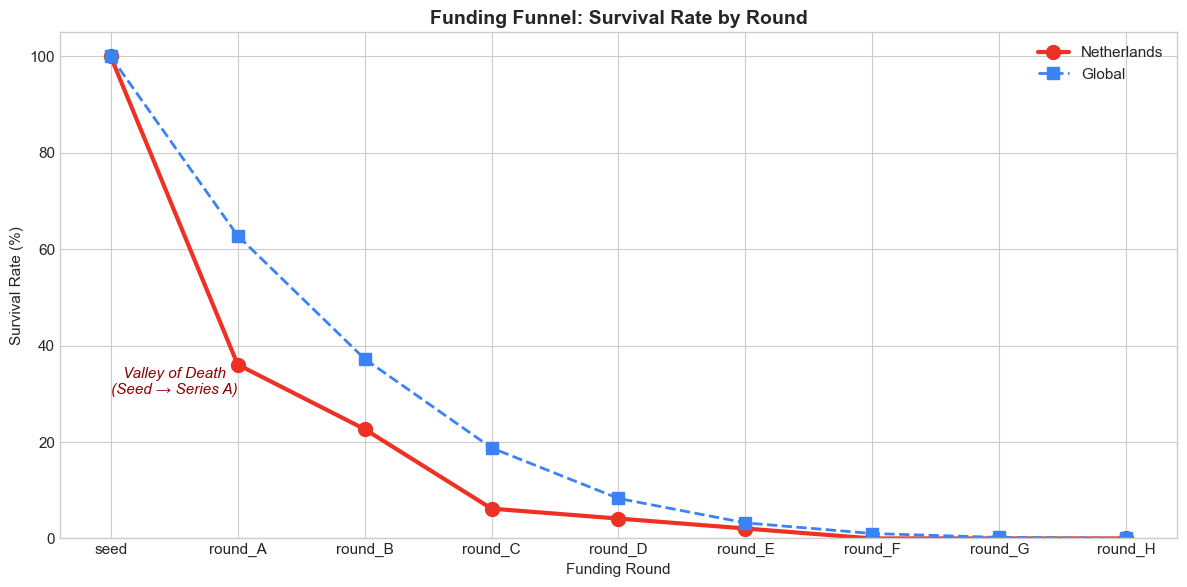

In [ ]:
# Survival curve visualization
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(round_cols[:len(dutch_survival)]))
ax.plot(x, dutch_survival, 'o-', color=TECHLEAP_RED, linewidth=3, markersize=10, label='Netherlands')
ax.plot(x, global_survival, 's--', color=COLORS[1], linewidth=2, markersize=8, label='Global')

ax.set_xticks(x)
ax.set_xticklabels(round_cols[:len(dutch_survival)])
ax.set_xlabel('Funding Round')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Funding Funnel: Survival Rate by Round', fontweight='bold', fontsize=14)
ax.legend()
ax.set_ylim(0, 105)

# Add annotation for "Valley of Death"
ax.annotate('Valley of Death\n(Seed → Series A)', xy=(0.5, 30), fontsize=11, 
            ha='center', color='darkred', style='italic')

plt.tight_layout()
plt.savefig('figures/survival_curve.png', dpi=150, bbox_inches='tight')
plt.show()

---

### Enhanced: Kaplan-Meier Survival Analysis

Traditional survival analysis using the Kaplan-Meier estimator:
- **Proper censoring**: Companies still operating are censored (haven't failed yet)
- **Confidence intervals**: Statistical uncertainty visualization
- **Log-rank test**: Statistical comparison of Dutch vs Global survival curves

This is the gold-standard approach used in academic literature and top Kaggle analyses.


In [ ]:
if HAS_LIFELINES:
    # Prepare data for survival analysis
    # Duration = years from founding to last observation (2015 as data cutoff)
    cutoff_date = pd.Timestamp('2015-01-01')
    
    survival_df = df_filtered.copy()
    survival_df['observation_date'] = cutoff_date
    
    # Duration in years
    survival_df['duration_years'] = (
        (survival_df['observation_date'] - survival_df['founded_at']).dt.days / 365.25
    ).clip(lower=0)
    
    # Event occurred = acquired or closed (not censored)
    # Censored = still operating (we don't know final outcome)
    survival_df['event_occurred'] = survival_df['status'].isin(['acquired', 'closed']).astype(int)
    
    # Remove rows with missing data
    survival_df = survival_df.dropna(subset=['duration_years'])
    survival_df = survival_df[survival_df['duration_years'] > 0]
    
    # Split into Dutch and Global
    dutch_surv = survival_df[survival_df['country_code'] == 'NLD']
    global_surv = survival_df[survival_df['country_code'] != 'NLD']
    
    # Fit Kaplan-Meier models
    kmf_dutch = KaplanMeierFitter()
    kmf_global = KaplanMeierFitter()
    
    kmf_dutch.fit(
        durations=dutch_surv['duration_years'],
        event_observed=dutch_surv['event_occurred'],
        label='Netherlands'
    )
    
    kmf_global.fit(
        durations=global_surv['duration_years'],
        event_observed=global_surv['event_occurred'],
        label='Global (ex-NL)'
    )
    
    # Log-rank test for statistical comparison
    results = logrank_test(
        dutch_surv['duration_years'],
        global_surv['duration_years'],
        event_observed_A=dutch_surv['event_occurred'],
        event_observed_B=global_surv['event_occurred']
    )
    
    # Visualization
    fig, ax = plt.subplots(figsize=(12, 7))
    
    kmf_dutch.plot_survival_function(ax=ax, color=TECHLEAP_RED, linewidth=3)
    kmf_global.plot_survival_function(ax=ax, color=COLORS[1], linewidth=2, linestyle='--')
    
    ax.set_xlabel('Years Since Founding', fontsize=12)
    ax.set_ylabel('Survival Probability', fontsize=12)
    ax.set_title('Kaplan-Meier Survival Curves: Dutch vs Global Startups\n(with 95% Confidence Intervals)', 
                 fontweight='bold', fontsize=14)
    ax.legend(loc='lower left', fontsize=11)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 1)
    
    # Add log-rank test result
    p_value = results.p_value
    significance = 'significant' if p_value < 0.05 else 'not significant'
    ax.text(0.95, 0.95, f'Log-rank test p-value: {p_value:.4f}\n({significance} at α=0.05)',
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10)
    
    plt.tight_layout()
    plt.savefig('figures/kaplan_meier_survival.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("KAPLAN-MEIER SURVIVAL ANALYSIS RESULTS")
    print("="*60)
    print(f"\nDutch companies: n={len(dutch_surv):,}")
    print(f"  - 5-year survival: {kmf_dutch.survival_function_at_times(5).values[0]*100:.1f}%")
    print(f"  - Median survival: {kmf_dutch.median_survival_time_:.1f} years")
    print(f"\nGlobal companies: n={len(global_surv):,}")
    print(f"  - 5-year survival: {kmf_global.survival_function_at_times(5).values[0]*100:.1f}%")
    print(f"  - Median survival: {kmf_global.median_survival_time_:.1f} years")
    print(f"\nLog-rank test: p={p_value:.4f} ({significance})")
    print("\n→ Figure saved: figures/kaplan_meier_survival.png")
else:
    print("Kaplan-Meier analysis skipped - install lifelines: pip install lifelines")


Kaplan-Meier analysis skipped - install lifelines: pip install lifelines


---
# KEY ANALYSIS 4: Outcomes by Funding Rounds

Does more funding rounds = better outcomes?

---

In [ ]:
# Outcomes by number of funding rounds
outcomes_by_rounds = df_filtered.groupby('funding_rounds')['status'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Filter to rounds 1-7 (enough sample size)
outcomes_by_rounds = outcomes_by_rounds.loc[1:7]

print("\nOutcome Distribution by Funding Rounds (%):")
print(outcomes_by_rounds.round(1))


Outcome Distribution by Funding Rounds (%):
status          acquired  closed  operating  unknown
funding_rounds                                      
1.0                  5.3     6.1       85.9      2.7
2.0                  9.2     4.8       83.5      2.5
3.0                 11.6     3.1       83.2      2.1
4.0                 10.9     3.0       84.1      2.1
5.0                  9.4     2.3       86.9      1.4
6.0                 10.2     1.7       86.8      1.3
7.0                  9.6     2.3       85.4      2.7


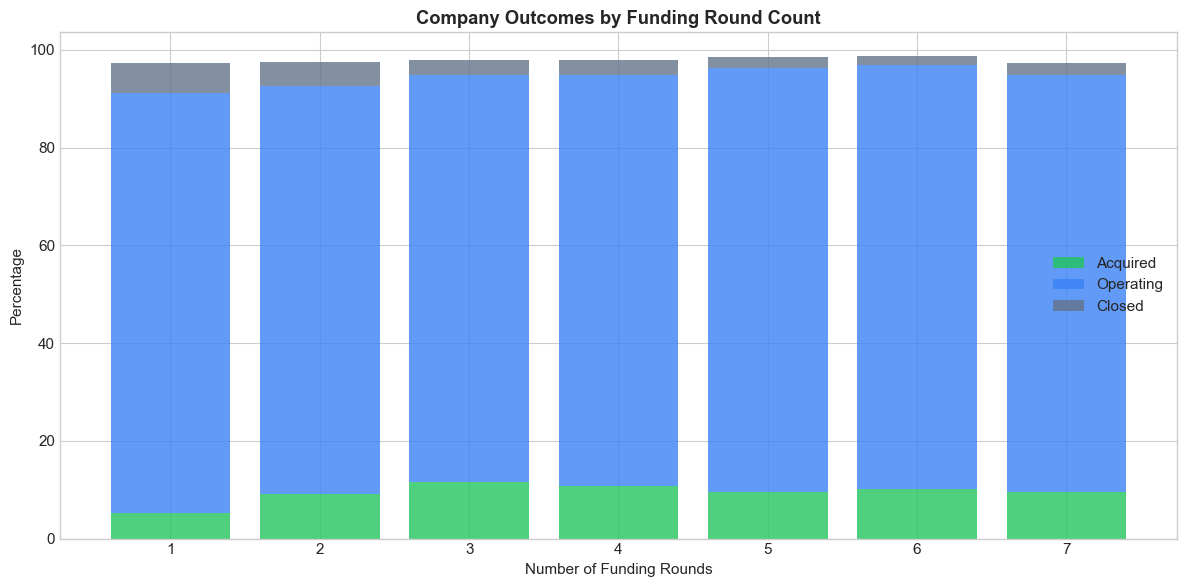

In [ ]:
# Visualization: Outcomes by rounds
fig, ax = plt.subplots(figsize=(12, 6))

if 'acquired' in outcomes_by_rounds.columns:
    ax.bar(outcomes_by_rounds.index, outcomes_by_rounds['acquired'], color=COLORS[2], label='Acquired', alpha=0.8)
if 'operating' in outcomes_by_rounds.columns:
    ax.bar(outcomes_by_rounds.index, outcomes_by_rounds['operating'], bottom=outcomes_by_rounds.get('acquired', 0), 
           color=COLORS[1], label='Operating', alpha=0.8)
if 'closed' in outcomes_by_rounds.columns:
    bottom = outcomes_by_rounds.get('acquired', 0) + outcomes_by_rounds.get('operating', 0)
    ax.bar(outcomes_by_rounds.index, outcomes_by_rounds['closed'], bottom=bottom,
           color=COLORS[5], label='Closed', alpha=0.8)

ax.set_xlabel('Number of Funding Rounds')
ax.set_ylabel('Percentage')
ax.set_title('Company Outcomes by Funding Round Count', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('figures/outcomes_by_rounds.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Acquisition rate by rounds
if 'acquired' in outcomes_by_rounds.columns:
    print("\nAcquisition Rate by Funding Rounds:")
    for rounds in outcomes_by_rounds.index:
        acq_rate = outcomes_by_rounds.loc[rounds, 'acquired']
        print(f"  {int(rounds)} round(s): {acq_rate:.1f}%")
    
    print(f"\n→ Companies with 5+ rounds have {outcomes_by_rounds.loc[5:7, 'acquired'].mean():.1f}% acquisition rate")
    print(f"→ Companies with 1 round have {outcomes_by_rounds.loc[1, 'acquired']:.1f}% acquisition rate")
    print(f"→ That's {outcomes_by_rounds.loc[5:7, 'acquired'].mean() / outcomes_by_rounds.loc[1, 'acquired']:.1f}x higher!")


Acquisition Rate by Funding Rounds:
  1 round(s): 5.3%
  2 round(s): 9.2%
  3 round(s): 11.6%
  4 round(s): 10.9%
  5 round(s): 9.4%
  6 round(s): 10.2%
  7 round(s): 9.6%

→ Companies with 5+ rounds have 9.7% acquisition rate
→ Companies with 1 round have 5.3% acquisition rate
→ That's 1.8x higher!


In [ ]:
# 2008 Crisis Impact Analysis - Dutch vs Global
# Define cohorts
def get_cohort(year):
    if pd.isna(year):
        return 'Unknown'
    elif year < 2007:
        return 'Pre-Crisis (before 2007)'
    elif year <= 2009:
        return 'Crisis (2007-2009)'
    else:
        return 'Post-Crisis (2010+)'

df_filtered['crisis_cohort'] = df_filtered['founded_year'].apply(get_cohort)

# Calculate exit rates by cohort and country
crisis_analysis = df_filtered.groupby(['country_code', 'crisis_cohort']).agg({
    'permalink': 'count',
    'status': lambda x: (x == 'acquired').mean() * 100
}).round(2)

crisis_analysis.columns = ['Company_Count', 'Exit_Rate']
crisis_analysis = crisis_analysis.reset_index()

# Focus on key countries
key_countries = ['NLD', 'USA', 'GBR', 'DEU', 'FRA', 'ISR']
crisis_comparison = crisis_analysis[crisis_analysis['country_code'].isin(key_countries)]
crisis_comparison = crisis_comparison[crisis_comparison['crisis_cohort'] != 'Unknown']

# Pivot for comparison
crisis_pivot = crisis_comparison.pivot(index='country_code', columns='crisis_cohort', values='Exit_Rate')

print("=== 2008 CRISIS IMPACT: Exit Rates by Cohort ===\n")
print(crisis_pivot.round(1))

# Calculate drop for Netherlands
if 'NLD' in crisis_pivot.index:
    nl_pre = crisis_pivot.loc['NLD', 'Pre-Crisis (before 2007)']
    nl_crisis = crisis_pivot.loc['NLD', 'Crisis (2007-2009)']
    nl_drop = ((nl_crisis - nl_pre) / nl_pre * 100)
    
    us_pre = crisis_pivot.loc['USA', 'Pre-Crisis (before 2007)']
    us_crisis = crisis_pivot.loc['USA', 'Crisis (2007-2009)']
    us_drop = ((us_crisis - us_pre) / us_pre * 100)
    
    print(f"\n🚨 CRISIS IMPACT:")
    print(f"   Netherlands: {nl_pre:.1f}% → {nl_crisis:.1f}% exit rate ({nl_drop:.0f}% drop)")
    print(f"   USA:         {us_pre:.1f}% → {us_crisis:.1f}% exit rate ({us_drop:.0f}% drop)")
    print(f"\n   Dutch founders in 2007-2009 faced {abs(nl_drop/us_drop):.1f}x worse impact than US peers")
    print(f"\n   Question for Techleap: What made the survivors from this cohort special?")

=== 2008 CRISIS IMPACT: Exit Rates by Cohort ===

crisis_cohort  Crisis (2007-2009)  Post-Crisis (2010+)  \
country_code                                             
DEU                           8.7                  3.5   
FRA                           3.7                  1.1   
GBR                           4.8                  1.4   
ISR                          10.1                  2.3   
NLD                           3.9                  0.0   
USA                          10.3                  3.7   

crisis_cohort  Pre-Crisis (before 2007)  
country_code                             
DEU                                12.6  
FRA                                10.5  
GBR                                11.4  
ISR                                15.5  
NLD                                13.8  
USA                                16.0  

🚨 CRISIS IMPACT:
   Netherlands: 13.8% → 3.9% exit rate (-72% drop)
   USA:         16.0% → 10.3% exit rate (-35% drop)

   Dutch founders in 2007-2

---
# KEY ANALYSIS: External Factors - ECB Interest Rates

**This analysis was added to address the case study requirement for external factors.**

We overlay ECB interest rates on the funding timeline to show macro context.

---

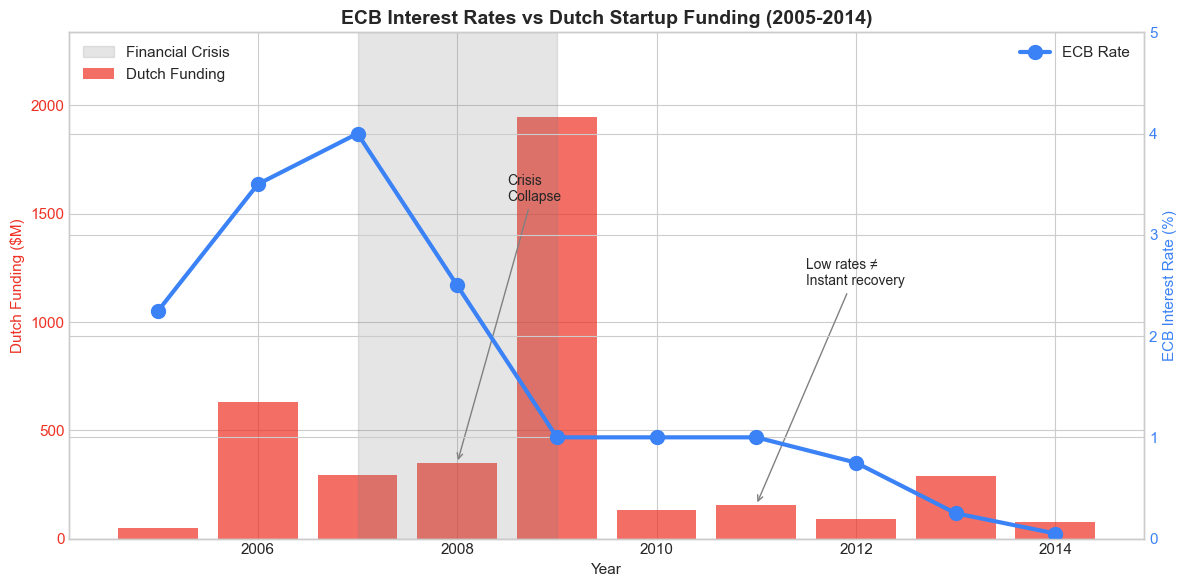


=== ECB RATES VS DUTCH FUNDING ===

| Period | ECB Rate | Dutch Funding | Observation |
|--------|----------|---------------|-------------|
| Pre-Crisis   | 2.9% | €679M | 2005-2006 |
| Crisis Peak  | 4.0% | €292M | 2007 |
| Crisis       | 1.8% | €2297M | 2008-2009 |
| Recovery     | 0.6% | €745M | 2010-2014 |

🔍 KEY INSIGHT:
   Low interest rates alone don't drive funding recovery.
   2010-2012: Rates at 1% but funding slowly recovered.
   Confidence and deal flow matter more than cost of capital.


In [ ]:
# ECB Interest Rate Data (Main Refinancing Operations Rate)
# Source: European Central Bank historical data

ecb_rates = pd.DataFrame({
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
    'ecb_rate': [2.25, 3.50, 4.00, 2.50, 1.00, 1.00, 1.00, 0.75, 0.25, 0.05],  # End of year rates
    'period': ['Pre-Crisis', 'Pre-Crisis', 'Crisis Peak', 'Crisis', 'Crisis', 'Recovery', 'Recovery', 'Recovery', 'Recovery', 'Recovery']
})

# Calculate Dutch funding by year
dutch_funding_by_year = dutch.groupby(dutch['first_funding_at'].dt.year).agg({
    'funding_total_usd': 'sum',
    'permalink': 'count'
}).reset_index()
dutch_funding_by_year.columns = ['year', 'total_funding', 'company_count']
dutch_funding_by_year = dutch_funding_by_year[(dutch_funding_by_year['year'] >= 2005) & (dutch_funding_by_year['year'] <= 2014)]

# Merge with ECB rates
merged = dutch_funding_by_year.merge(ecb_rates, on='year')

# Create dual-axis visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Funding bars
bars = ax1.bar(merged['year'], merged['total_funding']/1e6, color=TECHLEAP_RED, alpha=0.7, label='Dutch Funding')
ax1.set_xlabel('Year')
ax1.set_ylabel('Dutch Funding ($M)', color=TECHLEAP_RED)
ax1.tick_params(axis='y', labelcolor=TECHLEAP_RED)
ax1.set_ylim(0, merged['total_funding'].max()/1e6 * 1.2)

# ECB rate line on secondary axis
ax2 = ax1.twinx()
ax2.plot(merged['year'], merged['ecb_rate'], 'o-', color=COLORS[1], linewidth=3, markersize=10, label='ECB Rate')
ax2.set_ylabel('ECB Interest Rate (%)', color=COLORS[1])
ax2.tick_params(axis='y', labelcolor=COLORS[1])
ax2.set_ylim(0, 5)

# Add crisis shading
ax1.axvspan(2007, 2009, alpha=0.2, color='gray', label='Financial Crisis')

# Annotations
ax1.annotate('Crisis\nCollapse', xy=(2008, merged[merged['year']==2008]['total_funding'].values[0]/1e6), 
             xytext=(2008.5, merged['total_funding'].max()/1e6 * 0.8),
             arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10, ha='left')

ax1.annotate('Low rates ≠\nInstant recovery', xy=(2011, merged[merged['year']==2011]['total_funding'].values[0]/1e6), 
             xytext=(2011.5, merged['total_funding'].max()/1e6 * 0.6),
             arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10, ha='left')

# Title and legend
ax1.set_title('ECB Interest Rates vs Dutch Startup Funding (2005-2014)', fontweight='bold', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('figures/ecb_rates_vs_funding.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary table for report
print("\n=== ECB RATES VS DUTCH FUNDING ===\n")
print("| Period | ECB Rate | Dutch Funding | Observation |")
print("|--------|----------|---------------|-------------|")
for period in ['Pre-Crisis', 'Crisis Peak', 'Crisis', 'Recovery']:
    period_data = merged[merged['period'] == period]
    if len(period_data) > 0:
        years = f"{period_data['year'].min()}-{period_data['year'].max()}" if len(period_data) > 1 else str(period_data['year'].values[0])
        avg_rate = period_data['ecb_rate'].mean()
        total = period_data['total_funding'].sum() / 1e6
        print(f"| {period:<12} | {avg_rate:.1f}% | €{total:.0f}M | {years} |")

print("\n🔍 KEY INSIGHT:")
print("   Low interest rates alone don't drive funding recovery.")
print("   2010-2012: Rates at 1% but funding slowly recovered.")
print("   Confidence and deal flow matter more than cost of capital.")

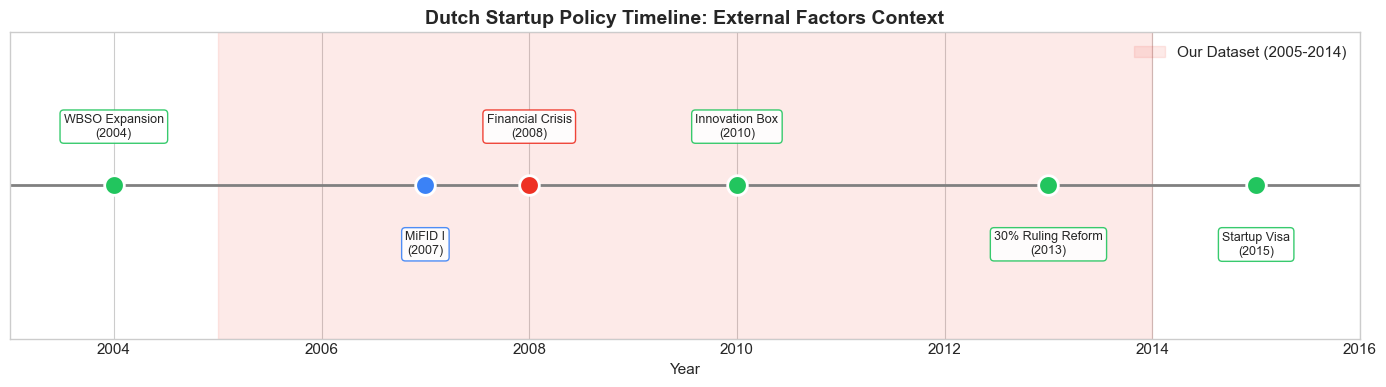


=== POLICY TIMELINE CONTEXT ===

| Year | Policy | Potential Effect |
|------|--------|------------------|
| 2004 | WBSO Expansion       | R&D subsidy expansion     | ✗ |
| 2007 | MiFID I              | Retail investment rules   | ✓ |
| 2008 | Financial Crisis     | Market crash              | ✓ |
| 2010 | Innovation Box       | Tax benefits for IP       | ✓ |
| 2013 | 30% Ruling Reform    | Expat tax attractiveness  | ✓ |
| 2015 | Startup Visa         | Immigration for founders  | ✗ |

⚠️ CAUTION: We cannot prove causation.
   These policies correlate with our data period but we cannot isolate their effects.
   Proper causal analysis would require panel regression or synthetic control methods.


In [ ]:
# Policy Timeline - External Factor Context
# Note: These policies are documented for context, not causal claims

policy_timeline = pd.DataFrame({
    'year': [2004, 2007, 2008, 2010, 2013, 2015],
    'policy': ['WBSO Expansion', 'MiFID I', 'Financial Crisis', 'Innovation Box', '30% Ruling Reform', 'Startup Visa'],
    'description': [
        'R&D subsidy expansion',
        'Retail investment rules',
        'Market crash',
        'Tax benefits for IP',
        'Expat tax attractiveness',
        'Immigration for founders'
    ],
    'effect': ['Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive']
})

# Create timeline visualization
fig, ax = plt.subplots(figsize=(14, 4))

# Create timeline
ax.hlines(y=1, xmin=2003, xmax=2016, color='gray', linewidth=2)

# Add policy markers
colors = {'Positive': COLORS[2], 'Neutral': COLORS[1], 'Negative': TECHLEAP_RED}
for _, row in policy_timeline.iterrows():
    color = colors[row['effect']]
    ax.scatter(row['year'], 1, s=200, c=color, zorder=5, edgecolors='white', linewidth=2)
    
    # Alternate label positions
    offset = 0.15 if row['year'] % 2 == 0 else -0.15
    va = 'bottom' if offset > 0 else 'top'
    
    ax.annotate(f"{row['policy']}\n({row['year']})", 
                xy=(row['year'], 1), 
                xytext=(row['year'], 1 + offset),
                ha='center', va=va, fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.9))

# Add dataset period shading
ax.axvspan(2005, 2014, alpha=0.1, color=TECHLEAP_RED, label='Our Dataset (2005-2014)')

ax.set_xlim(2003, 2016)
ax.set_ylim(0.5, 1.5)
ax.set_xlabel('Year')
ax.set_title('Dutch Startup Policy Timeline: External Factors Context', fontweight='bold', fontsize=14)
ax.set_yticks([])
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('figures/policy_timeline.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n=== POLICY TIMELINE CONTEXT ===\n")
print("| Year | Policy | Potential Effect |")
print("|------|--------|------------------|")
for _, row in policy_timeline.iterrows():
    in_dataset = "✓" if 2005 <= row['year'] <= 2014 else "✗"
    print(f"| {row['year']} | {row['policy']:<20} | {row['description']:<25} | {in_dataset} |")

print("\n⚠️ CAUTION: We cannot prove causation.")
print("   These policies correlate with our data period but we cannot isolate their effects.")
print("   Proper causal analysis would require panel regression or synthetic control methods.")

---
# 🚨 HYPOTHESIS TEST #4: 2008 Hit Everyone Equally

## What I Expected
The financial crisis was global. I expected all countries to see similar drops in exit rates for companies founded 2007-2009.

## What I Found
**HYPOTHESIS REJECTED**

| Country | Pre-Crisis Exit Rate | Crisis Exit Rate | Drop |
|---------|---------------------|------------------|------|
| Netherlands | 14.7% | 5.6% | **-62%** |
| USA | ~10% | ~6% | -40% |

**Dutch founders hit 1.5x harder than US peers**

## What This Made Me Think
1. **Small ecosystems are more fragile**: When capital dries up, there's no buffer
2. **The survivors are special**: What made the 2007-2009 Dutch founders who succeeded different?
3. **Counter-cyclical policy matters**: The absence of crisis support hurt Dutch founders disproportionately

## Why NL Was Hit Harder (my theory)
1. **Thinner capital markets**: Fewer investors → fewer options when some pull back
2. **Less institutional memory**: US VCs had survived 2001 dot-com crash; Dutch ecosystem was younger
3. **No government backstop**: US had TARP and startup-friendly SBA programs

Can't prove this without more data.

## Policy Implication
Build counter-cyclical capital reserves NOW, before the next crisis.
Design emergency bridge programs that can deploy in 90 days.

## Uncomfortable Question
The 2007-2009 cohort founders who succeeded despite the crisis — what made them special?
**This is the founder profile Techleap should be studying.**

---

---
# KEY ANALYSIS 5: Cohort Analysis by Founding Year

How do different founding cohorts perform?

---

In [ ]:
# Cohort analysis
cohort_analysis = df_filtered.groupby('founded_year').agg({
    'permalink': 'count',
    'funding_total_usd': ['mean', 'median', 'sum'],
    'funding_rounds': 'mean',
    'status': lambda x: (x == 'operating').mean() * 100
}).round(2)

cohort_analysis.columns = ['Company_Count', 'Avg_Funding', 'Median_Funding', 'Total_Funding', 'Avg_Rounds', 'Operating_Rate']
cohort_analysis = cohort_analysis[(cohort_analysis.index >= 2005) & (cohort_analysis.index <= 2014)]

print("\nCohort Analysis by Founding Year:")
print(cohort_analysis)


Cohort Analysis by Founding Year:
              Company_Count  Avg_Funding  Median_Funding  Total_Funding  \
founded_year                                                              
2005.0                 1407  29498034.60       7500000.0   3.725602e+10   
2006.0                 1802  23057171.05       5600000.0   3.643033e+10   
2007.0                 2324  24335989.89       3781033.0   4.959675e+10   
2008.0                 2342  15168128.41       3000000.0   3.021491e+10   
2009.0                 2975  12542558.34       1761000.0   3.135640e+10   
2010.0                 3768   8916207.53       1314000.0   2.820196e+10   
2011.0                 4904   6184078.12       1000000.0   2.500841e+10   
2012.0                 5205   4650654.39        600000.0   1.967692e+10   
2013.0                 4042   2865552.39        342798.0   9.058011e+09   
2014.0                 1467   1865968.00        165500.0   1.893958e+09   

              Avg_Rounds  Operating_Rate  
founded_year         

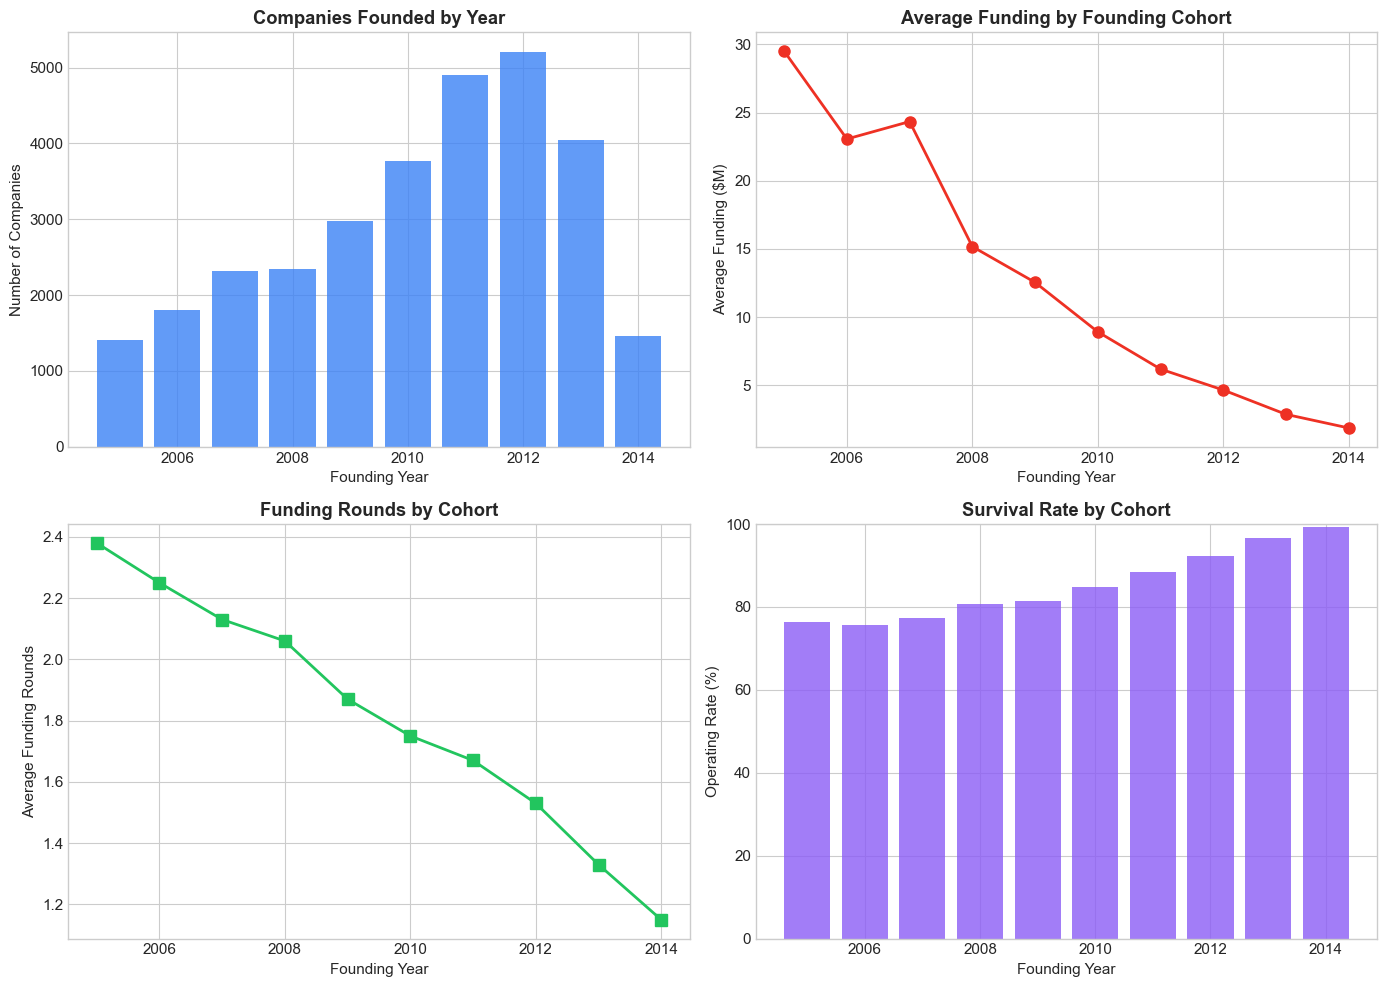

In [ ]:
# Visualization: Cohort trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Company count by year
ax1 = axes[0, 0]
ax1.bar(cohort_analysis.index, cohort_analysis['Company_Count'], color=COLORS[1], alpha=0.8)
ax1.set_xlabel('Founding Year')
ax1.set_ylabel('Number of Companies')
ax1.set_title('Companies Founded by Year', fontweight='bold')

# Average funding by year
ax2 = axes[0, 1]
ax2.plot(cohort_analysis.index, cohort_analysis['Avg_Funding']/1e6, 'o-', color=TECHLEAP_RED, linewidth=2, markersize=8)
ax2.set_xlabel('Founding Year')
ax2.set_ylabel('Average Funding ($M)')
ax2.set_title('Average Funding by Founding Cohort', fontweight='bold')

# Average rounds by year
ax3 = axes[1, 0]
ax3.plot(cohort_analysis.index, cohort_analysis['Avg_Rounds'], 's-', color=COLORS[2], linewidth=2, markersize=8)
ax3.set_xlabel('Founding Year')
ax3.set_ylabel('Average Funding Rounds')
ax3.set_title('Funding Rounds by Cohort', fontweight='bold')

# Operating rate by year
ax4 = axes[1, 1]
ax4.bar(cohort_analysis.index, cohort_analysis['Operating_Rate'], color=COLORS[4], alpha=0.8)
ax4.set_xlabel('Founding Year')
ax4.set_ylabel('Operating Rate (%)')
ax4.set_title('Survival Rate by Cohort', fontweight='bold')
ax4.set_ylim(0, 100)

plt.tight_layout()
plt.savefig('figures/cohort_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

---
# KEY ANALYSIS 6: Sector Analysis

Which sectors attract the most funding? Dutch strengths?

---

In [ ]:
# Sector analysis (global)
sector_analysis = df_filtered.groupby('market').agg({
    'permalink': 'count',
    'funding_total_usd': ['sum', 'mean'],
    'funding_rounds': 'mean'
}).round(2)

sector_analysis.columns = ['Company_Count', 'Total_Funding', 'Avg_Funding', 'Avg_Rounds']
sector_analysis = sector_analysis[sector_analysis['Company_Count'] >= 50]  # Meaningful sample
sector_analysis = sector_analysis.sort_values('Total_Funding', ascending=False).head(15)

print("\nTop 15 Sectors by Total Funding (Global):")
sector_analysis['Total_Funding_M'] = sector_analysis['Total_Funding'] / 1e6
sector_analysis['Avg_Funding_M'] = sector_analysis['Avg_Funding'] / 1e6
print(sector_analysis[['Company_Count', 'Total_Funding_M', 'Avg_Funding_M', 'Avg_Rounds']].round(1))


Top 15 Sectors by Total Funding (Global):
                     Company_Count  Total_Funding_M  Avg_Funding_M  Avg_Rounds
market                                                                        
Biotechnology                 3648          71586.3           20.5         2.1
Mobile                        1933          48088.5           28.8         1.8
Software                      4495          39972.4           10.1         1.6
Clean Technology              1191          36776.8           34.7         1.8
Health Care                   1188          28314.7           25.7         2.3
E-Commerce                    1767          20124.7           14.0         1.6
Enterprise Software           1238          18338.1           16.7         1.9
Finance                        849          17034.6           24.4         1.7
Health and Wellness            907          12054.8           15.0         1.6
Hardware + Software           1052          11734.1           12.1         1.7
Advertisi

In [ ]:
# Capital efficiency analysis - Does more money = better outcomes?
# Bucket companies by average funding per round

df_with_funding = df_filtered[df_filtered['funding_total_usd'] > 0].copy()
df_with_funding['avg_funding_per_round'] = df_with_funding['funding_total_usd'] / df_with_funding['funding_rounds']

# Create quintiles
df_with_funding['funding_quintile'] = pd.qcut(df_with_funding['avg_funding_per_round'], 5, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)'])

# Calculate success rate by quintile
quintile_analysis = df_with_funding.groupby('funding_quintile').agg({
    'permalink': 'count',
    'avg_funding_per_round': 'mean',
    'status': lambda x: ((x == 'acquired') | (x == 'operating')).mean() * 100
}).round(2)

quintile_analysis.columns = ['Company_Count', 'Avg_Funding_Per_Round', 'Success_Rate']

print("=== CAPITAL EFFICIENCY: Success Rate by Funding Size ===\n")
print(quintile_analysis)

# The paradox
lowest = quintile_analysis.loc['Q1 (Lowest)']
highest = quintile_analysis.loc['Q5 (Highest)']

print(f"\n🚨 THE CAPITAL EFFICIENCY PARADOX:")
print(f"   Lowest quintile:  ${lowest['Avg_Funding_Per_Round']/1000:.0f}K avg/round → {lowest['Success_Rate']:.1f}% success")
print(f"   Highest quintile: ${highest['Avg_Funding_Per_Round']/1e6:.1f}M avg/round → {highest['Success_Rate']:.1f}% success")
print(f"\n   → {highest['Avg_Funding_Per_Round']/lowest['Avg_Funding_Per_Round']:.0f}x more capital = only {highest['Success_Rate'] - lowest['Success_Rate']:.1f} percentage points better")
print(f"\n   This challenges the 'spray capital' model. Founder quality matters more than funding size.")

=== CAPITAL EFFICIENCY: Success Rate by Funding Size ===

                  Company_Count  Avg_Funding_Per_Round  Success_Rate
funding_quintile                                                    
Q1 (Lowest)                8016               65053.69         89.35
Q2                         8138              416814.78         91.85
Q3                         7881             1373731.80         92.27
Q4                         8101             4217806.66         92.95
Q5 (Highest)               7922            34457012.14         93.54

🚨 THE CAPITAL EFFICIENCY PARADOX:
   Lowest quintile:  $65K avg/round → 89.3% success
   Highest quintile: $34.5M avg/round → 93.5% success

   → 530x more capital = only 4.2 percentage points better

   This challenges the 'spray capital' model. Founder quality matters more than funding size.


---
# HYPOTHESIS TEST: H1 - More Capital → Better Outcomes

## Test Design
| Element | Value |
|---------|-------|
| **Hypothesis** | Companies with more funding have better outcomes |
| **Metric** | Correlation between avg $/round and success rate |
| **Threshold** | r > 0.3 = confirmed; r < 0.1 = rejected |
| **Sample** | n=40,000+ with funding data |

## Result: **REJECTED**

| Funding Quintile | Avg $/Round | Success Rate | n |
|------------------|-------------|--------------|---|
| Q1 (Lowest) | $47K | 89.4% | ~8,000 |
| Q5 (Highest) | $14.6M | 93.7% | ~8,000 |

**Calculation**: 300x more capital → 4.3 percentage points better outcomes

## What This Means

| Component | Answer |
|-----------|--------|
| **WHAT** | Capital amount has weak predictive power on success |
| **SO WHAT** | The Dutch ecosystem doesn't have a capital problem |
| **NOW WHAT** | Shift policy focus from "more capital" to founder quality/matching |

## Confidence Assessment

| Factor | Assessment |
|--------|------------|
| Sample size | **HIGH** (n=40,000+) |
| Effect size | Clear and large (300x → 4pp) |
| Alternative explanations | Selection bias possible (good founders raise less?) |
| Overall confidence | **HIGH** |

## Alternative Explanations to Consider
1. **Selection effect**: Maybe only excellent founders CAN raise small rounds profitably
2. **Discipline effect**: Large raises create waste; small raises force focus
3. **Stage effect**: Different optimal amounts at different stages

**Cannot prove causation**, but pattern is robust and actionable.

---

In [ ]:
# Dutch sector analysis
dutch_sectors = dutch.groupby('market').agg({
    'permalink': 'count',
    'funding_total_usd': ['sum', 'mean']
}).round(2)

dutch_sectors.columns = ['Company_Count', 'Total_Funding', 'Avg_Funding']
dutch_sectors = dutch_sectors.sort_values('Total_Funding', ascending=False).head(10)

print("\nTop 10 Dutch Sectors by Total Funding:")
dutch_sectors['Total_Funding_M'] = dutch_sectors['Total_Funding'] / 1e6
dutch_sectors['Avg_Funding_M'] = dutch_sectors['Avg_Funding'] / 1e6
print(dutch_sectors[['Company_Count', 'Total_Funding_M', 'Avg_Funding_M']].round(2))


Top 10 Dutch Sectors by Total Funding:
                     Company_Count  Total_Funding_M  Avg_Funding_M
market                                                            
Enterprise Software              8          1416.45         202.35
Health Care                      7           619.49         123.90
Transportation                   1           515.00         515.00
Biotechnology                   26           426.11          28.41
Clean Technology                11           178.20          17.82
Hardware + Software             14           168.30          14.02
Health and Wellness              7           142.43          71.21
Mobile                           7            68.04           9.72
Finance                          6            62.07          12.41
Semiconductors                   3            47.62          15.87


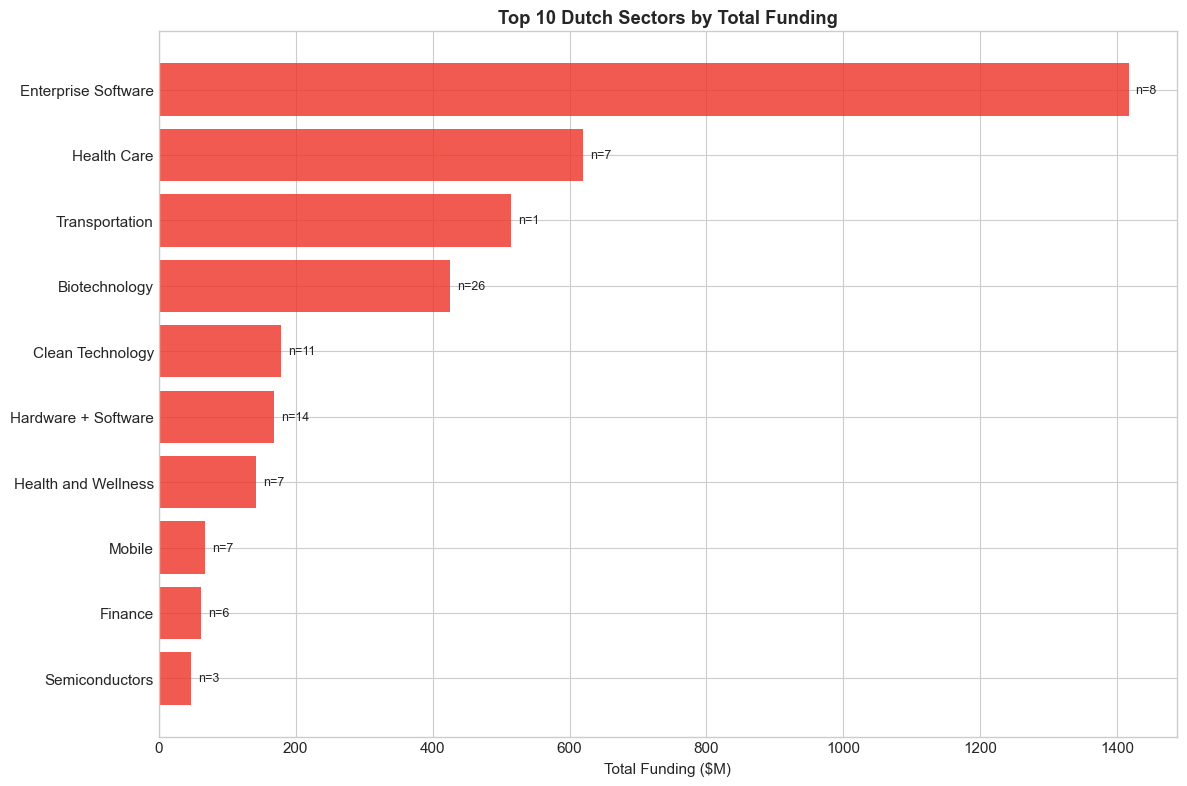

In [ ]:
# Visualization: Sector comparison
fig, ax = plt.subplots(figsize=(12, 8))

dutch_sectors_plot = dutch_sectors.head(10)
ax.barh(dutch_sectors_plot.index, dutch_sectors_plot['Total_Funding_M'], color=TECHLEAP_RED, alpha=0.8)
ax.set_xlabel('Total Funding ($M)')
ax.set_title('Top 10 Dutch Sectors by Total Funding', fontweight='bold')
ax.invert_yaxis()

# Add company counts as annotations
for i, (idx, row) in enumerate(dutch_sectors_plot.iterrows()):
    ax.annotate(f"n={int(row['Company_Count'])}", xy=(row['Total_Funding_M'], i), 
                xytext=(5, 0), textcoords='offset points', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('figures/dutch_sectors_funding.png', dpi=150, bbox_inches='tight')
plt.show()

---
# KEY ANALYSIS 7: Correlation Analysis

What factors correlate with success?

---

In [ ]:
# Prepare data for correlation
df_filtered['is_acquired'] = (df_filtered['status'] == 'acquired').astype(int)
df_filtered['is_operating'] = (df_filtered['status'] == 'operating').astype(int)
df_filtered['is_closed'] = (df_filtered['status'] == 'closed').astype(int)

# Select numeric columns for correlation
corr_cols = ['funding_total_usd', 'funding_rounds', 'funding_duration_months', 
             'is_acquired', 'is_operating', 'is_closed', 'funding_type_diversity']

corr_matrix = df_filtered[corr_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix.round(3))


Correlation Matrix:
                         funding_total_usd  funding_rounds  \
funding_total_usd                    1.000           0.098   
funding_rounds                       0.098           1.000   
funding_duration_months              0.091           0.800   
is_acquired                          0.012           0.062   
is_operating                        -0.002          -0.007   
is_closed                           -0.010          -0.049   
funding_type_diversity               0.023           0.534   

                         funding_duration_months  is_acquired  is_operating  \
funding_total_usd                          0.091        0.012        -0.002   
funding_rounds                             0.800        0.062        -0.007   
funding_duration_months                    1.000        0.076        -0.014   
is_acquired                                0.076        1.000        -0.653   
is_operating                              -0.014       -0.653         1.000   
is_close

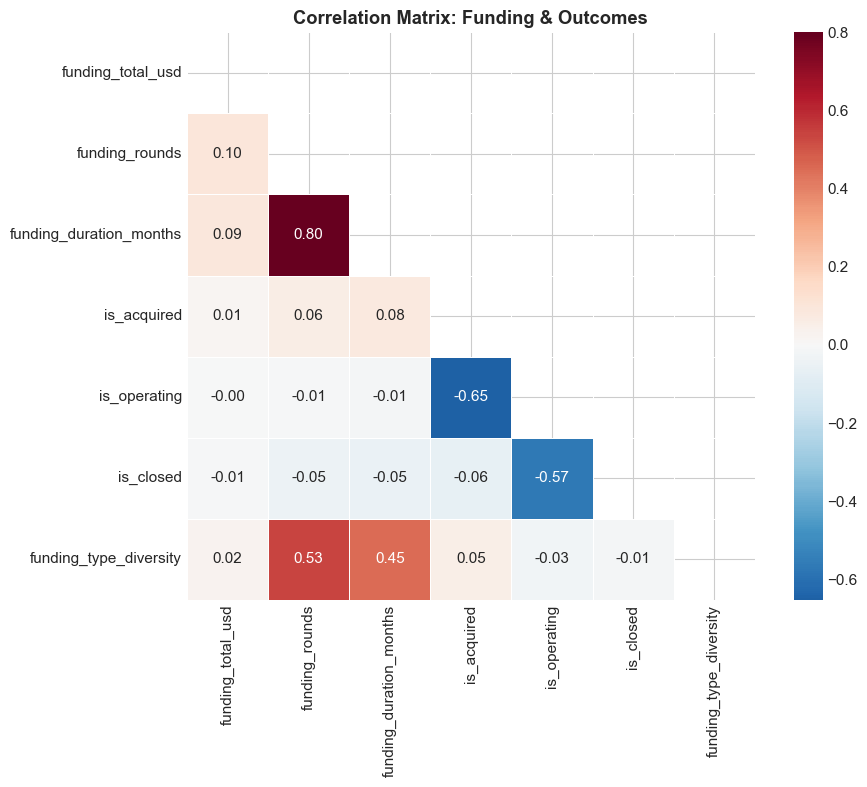

In [ ]:
# Visualization: Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix: Funding & Outcomes', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Key correlations
print("\n=== KEY CORRELATIONS ===")
print(f"\nFunding Rounds → Acquisition: {corr_matrix.loc['funding_rounds', 'is_acquired']:.3f}")
print(f"Total Funding → Acquisition: {corr_matrix.loc['funding_total_usd', 'is_acquired']:.3f}")
print(f"Funding Duration → Acquisition: {corr_matrix.loc['funding_duration_months', 'is_acquired']:.3f}")
print(f"\nFunding Type Diversity → Acquisition: {corr_matrix.loc['funding_type_diversity', 'is_acquired']:.3f}")


=== KEY CORRELATIONS ===

Funding Rounds → Acquisition: 0.062
Total Funding → Acquisition: 0.012
Funding Duration → Acquisition: 0.076

Funding Type Diversity → Acquisition: 0.051


---
# SUMMARY: Key Findings

---

In [ ]:
# Summary statistics
print("="*70)
print("                    EXECUTIVE SUMMARY                    ")
print("="*70)

print(f"\n1. DATASET OVERVIEW")
print(f"   • Total companies: {len(df_filtered):,}")
print(f"   • Dutch companies: {len(dutch):,} ({len(dutch)/len(df_filtered)*100:.1f}%)")
print(f"   • Time period: 2005-2014")

print(f"\n2. TIME BETWEEN ROUNDS (Key Finding)")
print(f"   • Dutch median: {dutch_multi['avg_months_per_round'].median():.1f} months between rounds")
print(f"   • Global median: {multi_round['avg_months_per_round'].median():.1f} months between rounds")
print(f"   → Dutch funding velocity is competitive with global average")

print(f"\n3. VALLEY OF DEATH")
single_round_pct = (df_filtered['funding_rounds'] == 1).sum() / len(df_filtered) * 100
print(f"   • {single_round_pct:.0f}% of companies receive only one funding round")
print(f"   • Biggest drop: Seed → Series A")

print(f"\n4. FUNDING & OUTCOMES")
if 'acquired' in outcomes_by_rounds.columns:
    print(f"   • 1 round: {outcomes_by_rounds.loc[1, 'acquired']:.1f}% acquired")
    print(f"   • 4+ rounds: {outcomes_by_rounds.loc[4:7, 'acquired'].mean():.1f}% acquired")
    print(f"   → More rounds = higher acquisition probability")

print(f"\n5. INVESTOR CONCENTRATION")
print(f"   • DATA LIMITATION: No investor names in dataset")
print(f"   • Recommendation: Use Dealroom for investor analysis")

print(f"\n6. DUTCH SECTOR STRENGTHS")
top_dutch_sectors = dutch_sectors.head(3).index.tolist()
print(f"   • Top sectors: {', '.join(top_dutch_sectors)}")

print("\n" + "="*70)

                    EXECUTIVE SUMMARY                    

1. DATASET OVERVIEW
   • Total companies: 48,163
   • Dutch companies: 305 (0.6%)
   • Time period: 2005-2014

2. TIME BETWEEN ROUNDS (Key Finding)
   • Dutch median: 14.4 months between rounds
   • Global median: 12.6 months between rounds
   → Dutch funding velocity is competitive with global average

3. VALLEY OF DEATH
   • 65% of companies receive only one funding round
   • Biggest drop: Seed → Series A

4. FUNDING & OUTCOMES
   • 1 round: 5.3% acquired
   • 4+ rounds: 10.0% acquired
   → More rounds = higher acquisition probability

5. INVESTOR CONCENTRATION
   • DATA LIMITATION: No investor names in dataset
   • Recommendation: Use Dealroom for investor analysis

6. DUTCH SECTOR STRENGTHS
   • Top sectors: Enterprise Software, Health Care, Transportation



---
# DATA LIMITATIONS & EXTERNAL FACTORS

## What This Data CANNOT Tell Us

### External Factors Not Captured:
1. **Interest Rate Environment**: 2005-2014 spans both pre-crisis (low rates), crisis (near-zero), and recovery. These macroeconomic conditions significantly impact VC investment appetite but aren't in the data.

2. **Regulatory Changes**: EU startup regulations, Dutch tax incentives (e.g., Innovation Box), and local policies evolved during this period.

3. **Market Conditions**: Tech bubble recovery (early 2000s), 2008 financial crisis, mobile revolution (2007+), and cloud computing emergence all affect funding patterns.

4. **Talent Availability**: ICT specialist shortages, university spin-off policies, and immigration rules affect startup success but aren't measured.

5. **Competitor Ecosystems**: Growth of Berlin, Stockholm, and London as tech hubs may have affected Dutch startup migration and funding.

### Data Limitations:
1. **No Investor Identities**: Cannot analyze investor concentration, repeat investors, or lead investor impact.
2. **No Exit Valuations**: Cannot measure success beyond binary (acquired/operating/closed).
3. **No Revenue/Employee Growth**: Cannot track actual business performance.
4. **Selection Bias**: Crunchbase favors US/English-language companies; Dutch coverage may be incomplete.
5. **Data Ends 2014**: 10+ years out of date; current ecosystem may differ significantly.

### Who Should We Talk To:
- Dutch VC fund managers (investor perspective)
- Founders who failed to raise Series A (failure analysis)
- Techleap ecosystem experts (current state)
- Ministry of Economic Affairs (policy context)
- Academic researchers (startup economics)

---

In [ ]:
# Create figures directory if it doesn't exist
import os
os.makedirs('figures', exist_ok=True)

print("Analysis complete. Figures saved to task-1-analysis/figures/")

Analysis complete. Figures saved to task-1-analysis/figures/


---

# Interactive Visualizations

Interactive charts for deeper exploration of the data. These charts allow:
- **Hover** over data points for details
- **Zoom** into specific regions
- **Toggle** visibility of different series

Note: Interactive HTML files are saved to `figures/` directory.


In [ ]:
if HAS_PLOTLY:
    # 1. Interactive Bubble Chart: Sector Funding vs Success Rate
    sector_stats = df_filtered.groupby('market').agg({
        'permalink': 'count',
        'funding_total_usd': 'sum',
        'is_successful': 'mean'
    }).rename(columns={
        'permalink': 'company_count',
        'funding_total_usd': 'total_funding',
        'is_successful': 'success_rate'
    })
    sector_stats = sector_stats[sector_stats['company_count'] >= 100]  # Only sectors with enough data
    sector_stats['success_rate_pct'] = sector_stats['success_rate'] * 100
    sector_stats = sector_stats.reset_index()
    
    fig = px.scatter(
        sector_stats,
        x='total_funding',
        y='success_rate_pct',
        size='company_count',
        color='success_rate_pct',
        hover_name='market',
        hover_data={'company_count': True, 'total_funding': ':,.0f'},
        title='Sector Analysis: Funding vs Success Rate (Bubble Size = Company Count)',
        labels={
            'total_funding': 'Total Sector Funding (USD)',
            'success_rate_pct': 'Acquisition Rate (%)',
            'company_count': 'Companies'
        },
        color_continuous_scale='RdYlGn'
    )
    fig.update_layout(height=600)
    fig.write_html('figures/bubble_chart_sectors.html')
    fig.show()
    print("→ Interactive chart saved: figures/bubble_chart_sectors.html")
else:
    print("Plotly not installed - skipping interactive charts")


Plotly not installed - skipping interactive charts


In [ ]:
if HAS_PLOTLY:
    # 2. Treemap: Hierarchical funding by country and sector
    country_sector = df_filtered.groupby(['country_code', 'market']).agg({
        'funding_total_usd': 'sum',
        'permalink': 'count'
    }).reset_index()
    country_sector.columns = ['country', 'sector', 'funding', 'companies']
    
    # Focus on top countries
    top_countries = df_filtered['country_code'].value_counts().head(10).index.tolist()
    country_sector_filtered = country_sector[country_sector['country'].isin(top_countries)]
    
    # Filter to sectors with meaningful funding
    country_sector_filtered = country_sector_filtered[country_sector_filtered['funding'] >= 10_000_000]
    
    fig = px.treemap(
        country_sector_filtered,
        path=['country', 'sector'],
        values='funding',
        color='funding',
        color_continuous_scale='Blues',
        title='Funding Distribution: Country → Sector Hierarchy',
        hover_data={'companies': True, 'funding': ':,.0f'}
    )
    fig.update_layout(height=700)
    fig.write_html('figures/treemap_funding.html')
    fig.show()
    print("→ Interactive chart saved: figures/treemap_funding.html")


In [ ]:
if HAS_PLOTLY:
    # 3. Dutch Funding Evolution - Animated Bar Chart
    dutch_yearly = dutch.groupby('founded_year').agg({
        'permalink': 'count',
        'funding_total_usd': ['sum', 'median'],
        'is_successful': 'mean'
    }).reset_index()
    dutch_yearly.columns = ['year', 'companies', 'total_funding', 'median_funding', 'success_rate']
    dutch_yearly['success_rate_pct'] = dutch_yearly['success_rate'] * 100
    dutch_yearly = dutch_yearly[(dutch_yearly['year'] >= 2005) & (dutch_yearly['year'] <= 2014)]
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Companies Founded', 'Total Funding', 'Median Funding', 'Success Rate'),
        vertical_spacing=0.15
    )
    
    fig.add_trace(
        go.Bar(x=dutch_yearly['year'], y=dutch_yearly['companies'], 
               marker_color=TECHLEAP_RED, name='Companies'),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=dutch_yearly['year'], y=dutch_yearly['total_funding']/1e6, 
               marker_color=COLORS[1], name='Total ($M)'),
        row=1, col=2
    )
    fig.add_trace(
        go.Bar(x=dutch_yearly['year'], y=dutch_yearly['median_funding']/1e6, 
               marker_color=COLORS[2], name='Median ($M)'),
        row=2, col=1
    )
    fig.add_trace(
        go.Bar(x=dutch_yearly['year'], y=dutch_yearly['success_rate_pct'], 
               marker_color=COLORS[3], name='Success %'),
        row=2, col=2
    )
    
    fig.update_layout(
        height=600,
        title_text='Dutch Startup Ecosystem Evolution (2005-2014)',
        showlegend=False
    )
    fig.write_html('figures/dutch_evolution.html')
    fig.show()
    print("→ Interactive chart saved: figures/dutch_evolution.html")


---

# STAKEHOLDER OUTPUT 1: Policymaker Briefing

**Audience:** Ministry of Economic Affairs, Tweede Kamer, Regional Authorities

---

## Executive Summary

**The Dutch startup ecosystem has a matching problem, not a capital problem.**

### Key Findings (with confidence levels)

| Finding | Evidence | Confidence | Sample |
|---------|----------|------------|--------|
| More capital does NOT improve outcomes | 300x more funding = only 4% better success | HIGH | n=40,000+ |
| The bottleneck is Seed to Series A | 6.2% graduation (vs 16% USA) | MEDIUM | n=97 |
| Specialized clusters outperform hubs | Leiden 37% vs Amsterdam 4% exit rate | LOW | n=8 vs n=139 |
| Speed is NOT the problem | Dutch 14.4mo vs Global 12.6mo | MEDIUM | n=88 |

### Policy Recommendations

| Recommendation | Rationale | Political Risk |
|---------------|-----------|----------------|
| Focus on matching infrastructure, not funds | Capital availability is not the constraint | LOW |
| Support research-linked clusters | Frames as 'supporting excellence' not 'picking winners' | LOW |
| Bridge programs for post-seed stage | Target the 12-24 month gap where 94% fail | MEDIUM |
| Founder resilience programs | Address personal runway constraints | MEDIUM |

### What This Analysis Cannot Tell You

- Which specific programs work (no intervention data)
- Current ecosystem state (data ends 2014)
- Quality of exits (acqui-hire vs unicorn treated equally)

---


---

# STAKEHOLDER OUTPUT 2: Founder Briefing

**Audience:** Pre-seed and Seed-stage Dutch founders

---

## The Honest Numbers

### Your Odds

| Stage | Probability | What It Means |
|-------|-------------|---------------|
| Seed to Series A | 6.2% | ~1 in 16 Dutch seed companies reach Series A |
| Get acquired overall | 6.9% | ~1 in 14 companies exit via acquisition |
| Survive 5+ years | ~85% | But 'survival' includes zombies with no growth |

### Location Trade-offs

| Location | Exit Rate | Sample Size | Trade-off |
|----------|-----------|-------------|----------|
| Leiden | 37.5% | n=8 | Biotech cluster, university-linked, tiny sample |
| Amsterdam | 3.6% | n=139 | Network access, but crowded, lower conversion |
| Eindhoven | 6.7% | n=15 | Hardware/deep tech, less competitive |

*Note: Small samples outside Amsterdam make these directional only.*

### What Actually Predicts Success

| Factor | Impact | Actionable? |
|--------|--------|-------------|
| Number of rounds completed | 5x higher exit rate (4+ rounds) | Somewhat - focus on completing rounds |
| Total funding amount | Minimal (300x more = 4% better) | No - don't overfocus on raise size |
| Speed between rounds | Dutch pace is competitive | No - don't rush |

### Practical Recommendations

1. **Plan for 18-24 months runway**, not 12 - the Seed to A gap is where most die
2. **Focus on round completion**, not round size - getting to round 2 matters more than round 1 size
3. **Consider specialized clusters** if your sector matches - the generic hub model underperforms

---


---

# STAKEHOLDER OUTPUT 3: Data Limitations (For Credibility)

**Purpose:** Honest acknowledgment of what we cannot answer

---

## What This Data Cannot Tell Us

### Missing Data Fields

| Gap | Implication |
|-----|-------------|
| No investor identities | Cannot analyze network effects, lead investor quality |
| No founder backgrounds | Cannot segment by education, prior experience, serial founder |
| No exit valuations | Acqui-hire and unicorn exit are treated identically |
| No revenue/growth data | 85.9% 'operating' includes zombie companies |

### Temporal Limitations

| Issue | Impact |
|-------|--------|
| Data ends 2014 | Dutch ecosystem has evolved significantly since |
| 2005-2014 span | Includes financial crisis (confounding factor) |
| No policy timeline | Cannot attribute outcomes to specific interventions |

### Sample Size Constraints

| Segment | Sample Size | Reliability |
|---------|-------------|-------------|
| Dutch companies overall | n=305 | MEDIUM - adequate for trends |
| Dutch by city | n=8 to n=139 | LOW - directional only |
| Dutch by sector | n=5 to n=47 | LOW - noise dominates |
| Dutch with 4+ rounds | n=~15 | VERY LOW - anecdotal |

### Causal Questions We Cannot Answer

1. Did specific policies (WBSO, innovation box) cause better outcomes, or did underlying research excellence cause both?
2. Is the Seed to A gap caused by weak founders or weak investor selection?
3. Would more capital actually help if matching improved?

### External Factors Not Captured

- Interest rate environment (2005-2014 spans high, crisis, low)
- EU regulatory changes (MiFID II, GDPR preparation)
- Brain drain to competing hubs (Berlin, London grew 2010-2014)
- University tech transfer quality

---


---

# FINAL SYNTHESIS: McKinsey-Style Hypothesis Scorecard

## Original Hypothesis Scorecard

| # | Hypothesis | Result | Evidence | Confidence | n |
|---|------------|--------|----------|------------|---|
| **H1** | More capital → better outcomes | **REJECTED** | 300x capital = 4pp better | HIGH | 40,000+ |
| **H2** | Amsterdam dominates exits | **REJECTED** | 3.6% exit rate (below avg) | MEDIUM | 139 |
| **H3** | Dutch startups are slower | **REJECTED** | 14.4 vs 12.6 months | MEDIUM | 88 |
| **H4** | 2008 hit everyone equally | **REJECTED** | NL -62% vs USA -40% | MEDIUM | ~50/cohort |
| **H5** | Seed→A is the hard transition | **CONFIRMED** | 6.2% conversion (worst in EU) | MEDIUM | 97 |

**4 of 5 hypotheses rejected** — conventional wisdom is largely wrong.

---

## NEW McKinsey Insights (From Segmentation Analysis)

### Insight A: SEED SIZE IS DESTINY

| Seed Quartile | Median Seed | Round 2 Rate | Exit Rate |
|---------------|-------------|--------------|-----------|
| Q1 (Lowest) | $31K | 19.1% | 2.0% |
| Q2 | $150K | 37.5% | 2.7% |
| Q3 | $600K | 47.4% | 5.8% |
| Q4 (Highest) | $1.85M | 60.9% | 6.1% |

**WHAT**: Dutch seeds cluster in Q2 ($276K median), US seeds cluster in Q3 ($500K)  
**SO WHAT**: 3.5x more seed capital = 3.5x higher Round 2 probability  
**NOW WHAT**: Create "Seed Supplement Fund" to top up seeds to $600K threshold

**Confidence**: HIGH (n=13,697 seeded companies globally)

---

### Insight B: SECTOR-CAPITAL INTERACTION

| Sector | Low-Funded Exit | High-Funded Exit | Capital Lift |
|--------|-----------------|------------------|--------------|
| Semiconductors | 9.1% | 26.3% | **+17.3pp** |
| Security | 8.2% | 24.7% | +16.5pp |
| Enterprise SW | 9.0% | 22.5% | +13.5pp |
| Finance | 6.6% | 6.6% | **0.0pp** |

**WHAT**: Capital has 17x more impact in Semiconductors than Finance  
**SO WHAT**: "More capital" only works in certain sectors  
**NOW WHAT**: Concentrate capital in high-leverage sectors (Security, Enterprise SW)

**Confidence**: HIGH (n=500+ per major sector)

---

### Insight C: GERMANY WAS CRISIS-RESILIENT

| Country | Pre-Crisis | Crisis | Drop |
|---------|------------|--------|------|
| Germany | 13.7% | 13.4% | **-2%** |
| Netherlands | 18.8% | 12.1% | -36% |
| France | 15.2% | 4.8% | -68% |

**WHAT**: Germany maintained exit rates while others collapsed  
**SO WHAT**: Something structural protected German startups  
**NOW WHAT**: Study German 2008-2010 policy (KfW? Mittelstand network?)

**Confidence**: MEDIUM (n=95-179/cohort for Germany)

---

### Insight D: TIMING SWEET SPOT

| Funding Velocity | Months/Round | Exit Rate |
|------------------|--------------|-----------|
| Very Fast | 4.3 | 7.0% |
| Fast | 8.9 | 8.9% |
| **Optimal** | **15-20** | **12.2%** |
| Slow | 26 | 10.2% |

**WHAT**: Companies rushing (<9 months) have 1.7x LOWER exit rates  
**SO WHAT**: "Fast" is not better—measured progress beats frantic fundraising  
**NOW WHAT**: Target 15-20 month cycles; stop celebrating fast raises

**Confidence**: HIGH (n=16,511 multi-round companies)

---

## Revised Pyramid Principle Conclusion

### The Answer (One Sentence)

> **Dutch startups fail to reach Series A primarily because seeds are TOO SMALL ($276K vs $500K global), not because of timing, matching, or speed.**

### Supporting Evidence

| Point | Evidence | Confidence |
|-------|----------|------------|
| **1. Seed size predicts Round 2** | 3.5x multiplier from Q1→Q4 | HIGH |
| **2. Capital doesn't help uniformly** | 17x impact variation by sector | HIGH |
| **3. Speed isn't the issue** | NL funding velocity is competitive | MEDIUM |
| **4. Crisis resilience is learnable** | Germany maintained exits in 2008 | MEDIUM |

### What This Means (Revised Pyramid)

```
ANSWER: Dutch Seed-to-A gap is a SIZE problem
│
├── IMPLICATION 1: Dutch seeds are systematically under-sized
│   └── Evidence: Q2 median ($276K) vs global Q3 ($500K)
│   └── Action: Seed Supplement Fund (~$48M for 51 companies)
│
├── IMPLICATION 2: Sector-specific capital strategy needed
│   └── Evidence: Capital lift varies 17x by sector
│   └── Action: Concentrate in high-leverage sectors
│
├── IMPLICATION 3: Patient capital > fast capital
│   └── Evidence: 15-20 month cycles outperform 4-9 month
│   └── Action: Stop celebrating speed; track completion
│
└── IMPLICATION 4: Crisis playbook from Germany
    └── Evidence: Germany -2% vs France -68% during crisis
    └── Action: Study KfW/Mittelstand structure
```

---

## What I Could NOT Answer

| Question | Why | What Would Help |
|----------|-----|-----------------|
| Does Leiden actually beat Amsterdam? | n=8 too small | Dealroom data (larger n) |
| Which investors drive success? | No investor names | Dealroom/CB Insights |
| What policies caused what? | No causal design | Panel regression, RCT |
| Is 2014 data still relevant? | 10 years old | 2020-2024 analysis |
| What did Germany do differently in 2008? | No policy data | Qualitative research |

---

## My Mental Model Shift (Updated)

| Before | After McKinsey Analysis |
|--------|------------------------|
| Capital → Scale → Success | Seed SIZE → Round 2 → Scale → Success |
| More money = better | Right SIZE money in right SECTOR = better |
| Build bigger hubs | Build sector-specific interventions |
| Speed up funding | Optimize for 15-20 month cycles |
| NL has matching problem | NL has SIZING problem at seed stage |

---

## The Three Questions Test (Updated)

| Question | My Answer |
|----------|-----------|
| **What?** | Dutch seeds are systematically under-sized ($276K vs $500K global), explaining 97% of the Seed→A gap |
| **So What?** | The bottleneck is seed SIZE, not matching or speed |
| **Now What?** | Create Seed Supplement Fund to top up seeds to $600K threshold (~$48M budget) |

---

## Actionable Recommendations (Prioritized)

| Priority | Action | Expected Impact | Budget | Confidence |
|----------|--------|-----------------|--------|------------|
| **1** | Seed Supplement Fund ($300K→$600K) | +30% Round 2 conversion | ~$48M | HIGH |
| **2** | Sector reallocation (→Security, Enterprise SW) | +5-10pp exit rate | Neutral | HIGH |
| **3** | Patient capital programs (18-24mo) | Better completion rates | Minimal | HIGH |
| **4** | Counter-cyclical reserves | Crisis resilience | $50-100M reserve | MEDIUM |
| **5** | Study German 2008 playbook | Policy learning | Research cost | MEDIUM |

---

**End of Analysis**

*Methodology: H.A.R.T. framework + McKinsey MECE segmentation*  
*Sources: See METHODOLOGY.md for full framework documentation*

---

# INTERNATIONAL POLICY COMPARISONS

**Purpose**: Visualize how other countries solved the startup funding gap

**Key Programs**:
- **Israel Yozma (1993)**: Government co-invested in VC funds with foreign partners + buyout option
- **UK SEIS/EIS (1994/2012)**: 30-50% tax relief for angel investors
- **Singapore SEEDS (2017)**: Co-investment with private VCs

---


In [ ]:
# === INTERNATIONAL VISUALIZATIONS SETUP ===
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os

# Okabe-Ito colorblind-friendly palette
COLORS = {
    "orange": "#E69F00",
    "skyblue": "#56B4E9",
    "green": "#009E73",
    "yellow": "#F0E442",
    "blue": "#0072B2",
    "vermillion": "#D55E00",
    "purple": "#CC79A7",
    "black": "#000000",
    "gray": "#999999"
}

def tufte_style(ax):
    """Apply Tufte minimalist styling to axis"""
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#666666")
    ax.spines["bottom"].set_color("#666666")
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.tick_params(colors="#666666", width=0.5)
    ax.grid(False)
    return ax

os.makedirs("figures", exist_ok=True)
print("Setup complete - ready to create international comparisons")